# Final Project 
#### Jennifer Zhuang, Summer 2024

### Introduction 

In this project, we are allocated a budget of $1 million to construct a portfolio comprising 4 to 10 stocks. Over the course of the semester, we will track and analyze the performance of our portfolio and its individual stocks on a weekly basis. Key performance indicators such as the rate of return, standard deviation, Jensen index, Value at Risk, and so on will be utilized to evaluate our portfolio's performance and risk metrics. At the end of Module 10, we will compile a comprehensive report detailing overall performance and insights gained from managing our portfolio.

#### Tools Used:

Below are the tools that are used in this project:
- Python
- yfinance
- pandas
- numpy
- SciPy

### Stock Selection 
When selecting stocks to analyze in this project, I have chosen to focus on a few of the holdings within my personal investment account. This selection is motivated by a desire to gain deeper insight into the performance and risk characteristics of my current portfolio. By analyzing these stocks, I can apply theoretical concepts directly to investments I am already engaged in. This approach not only provides a personalized learning experience but also allows me to make more informed decisions about my future investment strategies. 

The following stocks and their corresponding ticker symbol will make up our portfolio:
- Broadcom Inc (AVGO)
- Fidelity Blue Chip Growth Fund (FBGRX)
- Alphabet Inc (GOOGL)
- Intuitive Surgical Inc (ISRG)
- Nvidia Corporation (NVDA)

__Markowitz Model & Minimum Variance Portfolio__

To determine how the \\$1 million should initially be split among the five stocks, we will apply the Markowitz model. This model solves the mathematical problem to find the minimum variance portfolio, or in other words, the most optimal weights for each stock in our portfolio. The model addresses the trade-off between the expected rate of return and the variance of returns in a portfolio. The problem is outlined below:
$$\textbf{minimize: }$$
$$\frac{1}{2}\sum_{i,j=1}^n w_iw_j\sigma_{ij}$$
$$\textbf{subject to: } $$
$$\sum_{i=1}^n w_i\bar{r}_i = \bar{r}$$
$$\sum_{i=1}^n w_i = 1$$
$$ w_i \geq 0 \text{ for } i = 1,..,n$$
Where:
- There are $n = 5$ assets
- Their mean rates of return are $r_i$
- $\bar{r}$ represents the expected return of the assets.
- Their covariances are $\sigma_{ij}$ for $i,j = 1,..,n$
- The portfolio is define by a set of weights $w_i$ for $i = 1,...,n$
- The minimum variance portfolio is achieved through

In the following codeblock, we'll use the Yahoo finance Python library, yfinance, to retrieve historical stock data going back one year, ending in Module 4 (June 24, 2024). The historical data can be refereced in Appendix A. We’ll analyze this data to calculate metrics such as mean rate of returns, standard deviations, and covariances between the stocks. This analysis will lay the groundwork for finding a solution for the Markowitz Model. The results are displayed below. 

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from IPython.display import Markdown, display

# Define the list of stock tickers
tickers = ['AVGO', 'FBGRX', 'GOOGL', 'ISRG', 'NVDA']
end_date = '2024-06-24'
start_date = '2023-06-24'

# Initialize a dictionary to hold dataframes
data_dict = {}

# Fetch data and calculate weekly returns for each ticker
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date, interval='1wk')
    data['Weekly Return'] = data['Adj Close'].pct_change()
    data = data.dropna(subset=['Weekly Return'])
    data_dict[ticker] = data[['Adj Close', 'Weekly Return']]

# Store the data
combined_data = pd.concat(data_dict, axis=1)
# display(combined_data)
r_avgo = combined_data['AVGO']['Weekly Return'].mean()
r_fbgrx = combined_data['FBGRX']['Weekly Return'].mean()
r_googl = combined_data['GOOGL']['Weekly Return'].mean()
r_isrg = combined_data['ISRG']['Weekly Return'].mean()
r_nvda = combined_data['NVDA']['Weekly Return'].mean()

std_avgo = combined_data['AVGO']['Weekly Return'].std()
std_fbgrx = combined_data['FBGRX']['Weekly Return'].std()
std_googl = combined_data['GOOGL']['Weekly Return'].std()
std_isrg = combined_data['ISRG']['Weekly Return'].std()
std_nvda = combined_data['NVDA']['Weekly Return'].std()


cov_avgo_fbgrx = combined_data['AVGO']['Weekly Return'].cov(combined_data['FBGRX']['Weekly Return'])
cov_avgo_googl = combined_data['AVGO']['Weekly Return'].cov(combined_data['GOOGL']['Weekly Return'])
cov_avgo_isrg = combined_data['AVGO']['Weekly Return'].cov(combined_data['ISRG']['Weekly Return'])
cov_avgo_nvda = combined_data['AVGO']['Weekly Return'].cov(combined_data['NVDA']['Weekly Return'])
cov_fbgrx_googl = combined_data['FBGRX']['Weekly Return'].cov(combined_data['GOOGL']['Weekly Return'])
cov_fbgrx_isrg = combined_data['FBGRX']['Weekly Return'].cov(combined_data['ISRG']['Weekly Return'])
cov_fbgrx_nvda = combined_data['FBGRX']['Weekly Return'].cov(combined_data['NVDA']['Weekly Return'])
cov_googl_isrg = combined_data['GOOGL']['Weekly Return'].cov(combined_data['ISRG']['Weekly Return'])
cov_googl_nvda = combined_data['GOOGL']['Weekly Return'].cov(combined_data['NVDA']['Weekly Return'])
cov_isrg_nvda = combined_data['ISRG']['Weekly Return'].cov(combined_data['NVDA']['Weekly Return'])

# Covariance matrix
cov_matrix = np.array([
    [std_avgo**2, cov_avgo_fbgrx, cov_avgo_googl, cov_avgo_isrg, cov_avgo_nvda],
    [cov_avgo_fbgrx, std_fbgrx**2, cov_fbgrx_googl, cov_fbgrx_isrg, cov_fbgrx_nvda],
    [cov_avgo_googl, cov_fbgrx_googl, std_googl**2, cov_googl_isrg, cov_googl_nvda],
    [cov_avgo_isrg, cov_fbgrx_isrg, cov_googl_isrg, std_isrg**2, cov_isrg_nvda],
    [cov_avgo_nvda, cov_fbgrx_nvda, cov_googl_nvda, cov_isrg_nvda, std_nvda**2]
])

markdown_content = f"""

\n The following values are the historical average returns for the past year:

- $\\bar{{r}}_{{avgo}}$ : {r_avgo}
- $\\bar{{r}}_{{fbgrx}}$ : {r_fbgrx}
- $\\bar{{r}}_{{googl}}$ : {r_googl}
- $\\bar{{r}}_{{isrg}}$ : {r_isrg}
- $\\bar{{r}}_{{nvda}}$ : {r_nvda}

"""

# Create a header row
header = "| $\\sigma_{{ij}}^2$| " + " | ".join(tickers) + " |"

# Create a separator row
separator = "|---" * (len(tickers) + 1) + "|"

# Create the rows for the table
rows = []
for i, asset in enumerate(tickers):
    row = f"| **{asset}** | " + " | ".join(f"{cov_matrix[i, j]:.10f}" for j in range(len(tickers))) + " |"
    rows.append(row)

# Combine all parts to form the complete table in Markdown
table = "\n".join([header, separator] + rows)
print()
# Display the Markdown content
markdown_string2 = f"""
And the following table shows the variance-covariance matrix for the given assets:

{table}
"""

display(Markdown(markdown_content + markdown_string2))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed





 The following values are the historical average returns for the past year:

- $\bar{r}_{avgo}$ : 0.014846704060285919
- $\bar{r}_{fbgrx}$ : 0.007125199678146891
- $\bar{r}_{googl}$ : 0.008843304235798268
- $\bar{r}_{isrg}$ : 0.005376945263756092
- $\bar{r}_{nvda}$ : 0.023532626453227113


And the following table shows the variance-covariance matrix for the given assets:

| $\sigma_{{ij}}^2$| AVGO | FBGRX | GOOGL | ISRG | NVDA |
|---|---|---|---|---|---|
| **AVGO** | 0.0038279820 | 0.0010132323 | 0.0008229623 | 0.0010091841 | 0.0022625047 |
| **FBGRX** | 0.0010132323 | 0.0005828321 | 0.0005580157 | 0.0006845655 | 0.0012095655 |
| **GOOGL** | 0.0008229623 | 0.0005580157 | 0.0017068266 | 0.0006587109 | 0.0010772455 |
| **ISRG** | 0.0010091841 | 0.0006845655 | 0.0006587109 | 0.0015720490 | 0.0012537818 |
| **NVDA** | 0.0022625047 | 0.0012095655 | 0.0010772455 | 0.0012537818 | 0.0037320721 |


To enhance clarity and understanding, we can substitute the values we calculated earlier into our Markowitz Model. For the expected return $\bar{r}$, I chose a value of $\bar{r} = 0.014$. This decision is based on our average rate of return for all the stocks, which is approximately 0.0118. I aimed for a target return that is slightly higher than the average. Below is the updated model:
$$\textbf{minimize: }$$
$$\sum_{i,j \in \{avgo,fbgrx,googl,isrg,nvda\}} \frac{1}{2}w_iw_j\sigma_{ij}$$
$$\textbf{subject to: } $$
$$ w_{avgo}\bar{r}_{avgo} + w_{fbgrx}\bar{r}_{fbgrx} + w_{googl}\bar{r}_{googl} + w_{isrg}\bar{r}_{isrg} + w_{nvda}\bar{r}_{nvda}= \bar{r} = 0.014$$
$$ w_{avgo} + w_{fbgrx} + w_{googl} + w_{isrg} + w_{nvda} = 1$$
$$ w_{avgo}, w_{fbgrx}, w_{googl},  w_{isrg}, w_{nvda}\geq 0 $$
In the next codeblock, we find our the optimal weights for each stock to start out our portfolio. 

In [2]:
from scipy.optimize import minimize

returns = np.array([r_avgo, r_fbgrx, r_googl, r_isrg, r_nvda])
std_devs = np.array([std_avgo, std_fbgrx, std_googl, std_isrg, std_nvda])
num_assets = len(returns)

# Objective function
def portfolio_variance(weights):
    return weights.T @ cov_matrix @ weights

# Constraints: weights sum to 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1} ,
               {'type': 'eq', 'fun': lambda weights: np.dot(weights, returns) - 0.014} )
bounds = tuple((0, 1) for _ in range(num_assets))

# Optimize
initial_weights = [0,0,0,0,0]
result = minimize(portfolio_variance, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights
optimal_weights = result.x
markdown_content = f""" 
$r_{{avg}}$ : {returns.mean()}

\n The following values are the optimal weights for each stock and the proportions we will start out with in our portfolio:
- $w_{{avgo}}$ : {round(optimal_weights[0], 2)}
- $w_{{fbgrx}}$ : {round(optimal_weights[1], 2)}
- $w_{{googl}}$ : {round(optimal_weights[2], 2)}
- $w_{{isrg}}$ : {round(optimal_weights[3], 2)}
- $w_{{nvda}}$ : {round(optimal_weights[4], 2)}

"""

display(Markdown(markdown_content))

 
$r_{avg}$ : 0.011944955938242857


 The following values are the optimal weights for each stock and the proportions we will start out with in our portfolio:
- $w_{avgo}$ : 0.23
- $w_{fbgrx}$ : 0.15
- $w_{googl}$ : 0.17
- $w_{isrg}$ : 0.14
- $w_{nvda}$ : 0.31



### Key Performance Indicators 
To effectively analyze our portfolio and its individual stocks, we will employ several key performance indicators (KPIs). These metrics will provide a comprehensive view of our investment performance and risk profile. The KPIs we will focus on are as follows:

#### Weekly Rate of Return & Standard Deviation ($\sigma$)

The __weekly rate of return__ measures the percentage of change in the value of an investment over a one-week period. It helps investors understand how much their investment has gained or lost in value during that time frame. Ideally, we want to see a positive rate of return, indicating that our investment has grown in value over the week. Consistent positive returns over the course of the semester suggests the investment is performing well and generating steady growth. 

To calculate the weekly rate of return of an individual stock, we us the following formula:

$$r = \frac{x_{end} - x_{start}}{x_{start}}\tag{1} $$
Where:
- $r$ is the weekly rate of return of our individual asset
- $x_{end}$ is the value of the investment (portfolio or individual stock) at the end of the week.
- $x_{start}$ is the value of the investment at the start of the week.

To find the weekly rate of return of our _entire_ portfolio which is comprised of $n$ assets, we first express the amount invested in each stock as weights, $w_i$, where $w_i$ is the proportion of asset $i$ in the portfolio. The rate of return is equal to the weighted sum of the corresponding individual asset returns. It can be calculated using the following formula:

$$r_{portfolio} = \sum_{i=1}^n w_ir_i\tag{2}$$
$$r_{portfolio} = w_{avgo}r_{avgo} + w_{fbgrx}r_{fbgrx} + w_{googl}r_{googl} + w_{isrg}r_{isrg} + w_{nvda}r_{nvda}$$
$$r_{portfolio} = 0.23r_{avgo} + 0.15r_{fbgrx} + 0.17r_{googl} + 0.14r_{isrg} + 0.31r_{nvda}$$
Where:
- $r_{portfolio}$ is the weekly rate of return of our entire portfolio
- $w_{i}$ is the weight or fraction of asset $i$ in the portfolio
- $r_i$ is the rate of return of asset $i$

__Standard deviation ($\sigma$)__ is a key measure of variability in an investment. It tells us how spread out the values are and how much they deviate from the mean of the dataset. In the context of our project, it typically refers to the standard deviation of the rate of return, not the prices themselves. A low standard deviation signifies that the returns are closely clustered around the mean, suggesting stability. Conversely, a high standard deviation means the returns are more spread out, reflecting greater variability. This increased variability corresponds to higher volatility and risk, providing valuable insight into an investment’s potential risk profile.

First, we calculate the average rate of return using the formula below:

$$\bar{r} = \frac{1}{n} \sum_{i=1}^n r_i \tag{3}$$
Where:
- $\bar{r}$ is the average rate of return
- $r_i$ is the rate of return for period $i$
- $n$ is the number of periods 

Then, to calculate the standard deviation, we evaluate the following:

$$\sigma = \sqrt{\frac{1}{n-1} \sum_{i=1}^n (r_i-\bar{r})^2} \tag{4}$$
Where:
- $\sigma$ is the standard deviation of our rate of return
- $r_i$ is the rate of return for period $i$
- $\bar{r}$ is the average rate of return
- $n$ is the number of periods

#### Beta
The __beta__ of an asset is a measure of its volatility relative to the overall market. It indicates how much the asset’s price is expected to move in relation to movements in the broader market, typically represented by a market index like the S&P 500. We can interpret the values as
- Beta = 1: The asset's price tends to move in line with the market.
- Beta > 1: The stock is more volatile than the market.
- Beta < 1: The stock is less volatile than the market.
- Beta < 0: The stock moves in the opposite direction of the market.

First, we calculate the covariance between the asset $i$ and the market $M$ over $n$ periods of time. Covariance is a statistical measure that indicates the degree to which two variables change together. In simpler terms, it shows whether an increase in one variable corresponds to an increase or decrease in another.
$$\sigma_{i,M} = \frac{1}{n-1}\sum_{i=1}^n (r_i-\hat{\bar{r}})(r_{Mi} - \hat{\bar{r}}_M) \tag{5}$$
Where:
- $\sigma_{i,M}$ is the covariance of asset $i$ with the market $M$
- $r_i$ is the rate of return of the asset in period $i$
- $\hat{\bar{r}}$ is the average rate of return of the asset and serves as an estimate of the true expected return
- $r_{Mi}$ is the rate of return of the market in period $i$
- $\hat{\bar{r}}_M$ is the average rate of return of the market
- $n$ is the number of periods

Then we compute the beta for the $i$th asset
$$\beta_i = \frac{\sigma_{iM}}{\sigma_M^2} \tag{6}$$
Where:
- $\sigma_{i,M}$ is the covariance of asset $i$ with the market $M$
- $\sigma_M$ is the standard deviation of the rate of return of the market. The square of that ($\sigma_M^2$) is the variance.

Lastly, to find the overall beta of a portfolio, we use the betas of the individual assets in the portfolio and take the weighted sum. 
$$\beta_{portfolio} = \sum_{i=1}^n w_i\beta_i \tag{7}$$
$$\beta_{portfolio} = w_{avgo}\beta_{avgo} + w_{fbgrx}\beta_{fbgrx} + w_{googl}\beta_{googl} + w_{isrg}\beta_{isrg} + w_{nvda}\beta_{nvda}$$
$$r_{portfolio} = 0.23\beta_{avgo} + 0.15\beta_{fbgrx} + 0.17\beta_{googl} + 0.14\beta_{isrg} + 0.31\beta_{nvda}$$
Where:
- $\beta_{portfolio}$ is the portfolio beta
- $w_i$ is the weight of asset $i$
- $\beta_i$ is the beta of asset $i$
- $n$ is the number of assets the portfolio contains

#### Jensen Index and Sharpe Ratio
The __Jensen Index__ is a performance measure used to assess the difference between the actual return of an investment and the return that would be expected based on its risk level, as predicted by the Capital Asset Pricing Model (CAPM). The CAPM provides an expected return for an investment based on its risk, specifically its beta, and the market's overall return.
- Positive Jensen Index: Means the investment has outperformed the expected return given its risk (beta).
- Negative Jensen Index: Means the investment has underperformed compared to the expected return.

$$ J = \beta(\hat{\bar{r}}_M - r_f) - (\hat{\bar{r}} - r_f) \tag{8}$$
Where:
- $J$ is the Jensen Index
- $\beta$ is the investment's beta
- $\hat{\bar{r}}_M$ is the average rate of return of the market
- $r_f$ is the risk free rate, usually the 1-year Treasury bill rate
  - The current 1-year Treasury bill rate is 4.78% as of July 2024
- $\hat{\bar{r}}$ is the investment's average rate of return

The __Sharpe Ratio__ measures the risk-adjusted return of an investment portfolio or asset. It finds the average rate of return of an asset in excess of the risk-free rate for each unit of risk taken. This ratio is usually compared to the market's Sharpe Ratio to help investors understand how much additional return they are receiving for the extra volatility they are exposing themselves to compared to a risk-free asset. 

We calculate this ratio using the following formula:
$$S = \frac{\hat{\bar{r}} - r_f}{\sigma}$$
Where:
- $S$ is the Sharpe Ratio
- $\hat{\bar{r}}$ is the average rate of return of the asset
- $r_f$ is the risk free rate, usually the 1-year Treasury bill rate
  - The current 1-year Treasury bill rate is 4.78% as of July 2024
- $\sigma$ is the standard deviation of the asset.

#### Value at Risk (VaR)

__Value at risk__ is a measure that helps investors understand and limit their potential losses. Given a position $X$, we specify a loss tolerance of $h$ and its corresponding cofidence level $1-h$. For that position and specified loss tolerance, the VaR measures the smallest number $V$ such that the probability of loss greater than $V$ is no more than $h$. Or in other words, VaR measures the smallest number $V$ such that the probability of a loss no more than $V$ is greater than $1-h$. 

We can derive the VaR by assuming the risks of individual assets in a portfolio follow a Gaussian (normal) distribution. Then given an position $X$ with mean $\mu$ and standard deviation $\sigma$, our VaR is as follows 
$$VaR_h(X) = -\sigma F^{-1}_N(h)-\mu$$
Where:
- $VaR$ is the value at risk for position $X$ and at a loss tolerance of $h$
- $\sigma$ is our position's standard deviation
- $\mu$ is the average of our position
- $F_N$ is the cumulative probability distribution function of the standardized normal variable
- $h$ is our loss tolerance

### Constant Variables

__Risk Free Rate__

When working with financial formulas that require the risk-free rate, it is essential to ensure that the rate's time frame matches the time frame of the data being used. Since our calculations involve weekly and daily stock returns, we need to convert the annual risk-free rate, such as the 1-year Treasury bill rate, into equivalent weekly and daily rates. This ensures that the risk-free rate is accurately represented in our models and calculations.

To convert the annual risk-free rate to a weekly rate, we use the following formula, which assumes compound interest:
$$r_{f,week} = (1 + r_{f})^{\frac{1}{52}}-1$$
$$r_{f,week} = (1 + 0.0478)^{\frac{1}{52}}-1 $$
$$= 0.0008983403429594361$$

To convert the annual risk-free rate to a daily rate, we perform the following:
$$r_{f,daily} = (1 + r_{f})^{\frac{1}{365}}-1$$
$$r_{f,daily} = (1 + 0.0478)^{\frac{1}{365}}-1 $$
$$= 0.00012793346495754143$$

To find the risk-free rate for our overall project duration, we will use a monthly rate:
$$r_{f,monthly} = (1 + r_{f})^{\frac{1}{12}}-1$$
$$r_{f,monthly} = (1 + 0.0478)^{\frac{1}{12}}-1 $$
$$= 0.003898640670782605$$

__Gaussian Normal Distribution__

When calculating Value at Risk (VaR), it is essential to determine the quantile of the cumulative normal distribution corresponding to a specific loss tolerance level. In this case, we will use a loss tolerance level of 5% for our analysis. To find this value, we calculate the inverse of the cumulative normal distribution (also known as the quantile function) at the 5% level in the codeblock below and find:
$$F^{-1}_N(0.05) = -1.64485$$

In [3]:
from scipy.stats import norm

# Set the loss tolerance level
loss_tolerance_level = 0.05

# Calculate the inverse cumulative normal distribution (quantile function)
quantile_value = norm.ppf(loss_tolerance_level)
quantile_value

-1.6448536269514729

### Individual Stock Analysis
#### The Market - S&P 500 (^GSPC)
In this section, we will collect and process the S&P 500's data from Module 4 (06/24/24) to Module 10 (present day). More specifically, we will collect the adjusted close price and calculate the rate of return. Using the daily rate of returns, we will calculate the weekly standard deviation as well as average weekly rate of return. 

In [4]:
end_date = '2024-07-29'
start_date = '2024-06-13'

# get weekly data and KPIs
sp500_week_data = yf.download('^GSPC', start=start_date, end=end_date, interval='1wk')
sp500_week_data['Weekly Return'] = sp500_week_data['Adj Close'].pct_change()

# get daily data 
sp500_day_data = yf.download('^GSPC', start=start_date, end=end_date, interval='1d')
sp500_day_data['Daily Return'] = sp500_day_data['Adj Close'].pct_change()

# calculate weekly standard deviation
weekly_std_dev = sp500_day_data['Daily Return'].resample('W').std()
dates = pd.date_range(start='2024-06-16', end='2024-07-28', freq='W')  # Weekly frequency
std_dev_series = pd.Series(weekly_std_dev, index=dates, name='Weekly SD')
std_dev_series = std_dev_series.reindex(sp500_week_data.index, method='ffill')  # Forward-fill NaNs if needed
sp500_week_data['Weekly SD'] = std_dev_series

# calculate weekly avg return
weekly_avg = sp500_day_data['Daily Return'].resample('W').mean()
avg_series = pd.Series(weekly_avg, index=dates, name='Weekly Avg Return')
avg_series = avg_series.reindex(sp500_week_data.index, method='ffill')  # Forward-fill NaNs if needed
sp500_week_data['Weekly Avg Return'] = avg_series

# calculate weekly avg adj close
weekly_avg_price = sp500_day_data['Adj Close'].resample('W').mean()
avg_price_series = pd.Series(weekly_avg_price, index=dates, name='Weekly Avg Price')
avg_price_series = avg_price_series.reindex(sp500_week_data.index, method='ffill')  # Forward-fill NaNs if needed
sp500_week_data['Weekly Avg Price'] = avg_price_series

sp500_daily_var = sp500_day_data['Daily Return'].var()
# Store Data
sp500_data = sp500_week_data[['Adj Close', 'Weekly Return', 'Weekly Avg Price', 'Weekly Avg Return', 'Weekly SD']].tail(5)

# calculate total return 
start_price = sp500_data['Adj Close'].iloc[0]
end_price = sp500_data['Adj Close'].iloc[-1]
total_return_sp500 = (end_price - start_price)/start_price

# calculate total sd
std_sp500 = sp500_day_data['Daily Return'].std()

# Save overall data
overall_kpis = pd.DataFrame(columns=['stock', 'return', 'standard deviation', 'beta', 'jensen index', 'sharpe ratio', 'VaR (h=.05)'])
overall_kpis.loc[len(overall_kpis)] = ['SP500', total_return_sp500, std_sp500, pd.NA, pd.NA, pd.NA, pd.NA]
display(overall_kpis.tail(1))        

display(sp500_data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,stock,return,standard deviation,beta,jensen index,sharpe ratio,VaR (h=.05)
0,SP500,-0.000253,0.007538,<NA>,<NA>,<NA>,<NA>


,Adj Close,Weekly Return,Weekly Avg Price,Weekly Avg Return,Weekly SD
Date,,,,,
2024-06-24,5460.479980,-0.000758,5474.512451,0.001524,0.004641
2024-07-01,5567.189941,0.019542,5467.683984,-0.000147,0.003344
2024-07-08,5615.350098,0.008651,5522.077393,0.004851,0.001522
2024-07-15,5505.000000,-0.019652,5596.726074,0.001744,0.007032
2024-07-22,5459.100098,-0.008338,5587.256055,-0.003934,0.008329


__S&P 500 Weekly Returns and Standard Deviation__

Below are two visualization showing the weekly rate of return and standard deviation for the S&P 500 throughout the semester. This visualization offers valuable insights into market volatility trends, which can be compared to the volatility and movement of our individual stocks. Additionally, it provides a benchmark for assessing the success of our portfolio, allowing us to evaluate performance by contrasting its returns to the returns of individual stocks. 

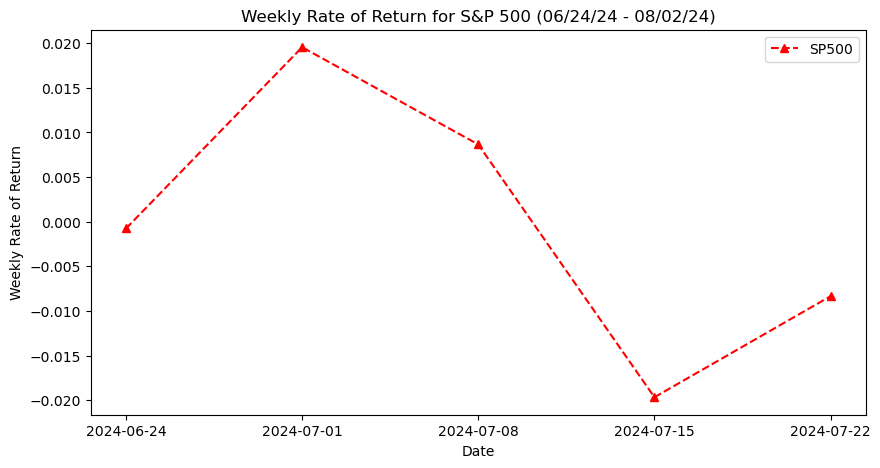

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
dates_list = sp500_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, sp500_data['Weekly Return'], label='SP500', color = 'red', marker='^',linestyle='--')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Rate of Return')
plt.title('Weekly Rate of Return for S&P 500 (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

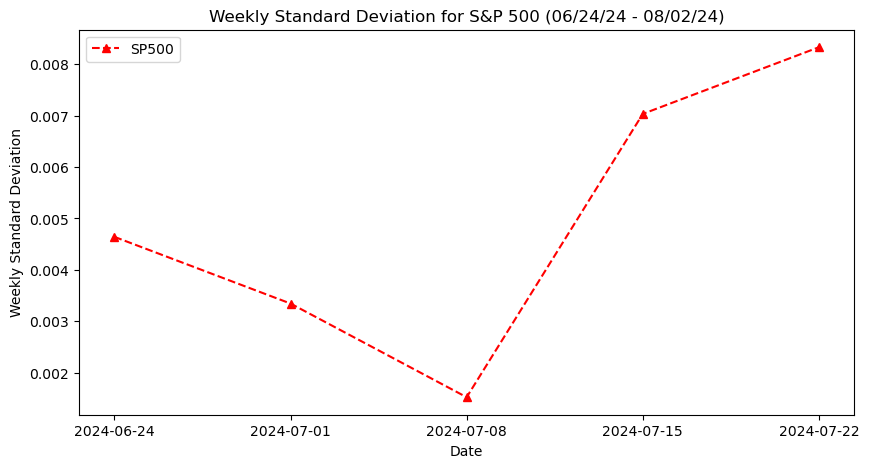

In [6]:
plt.figure(figsize=(10, 5))
dates_list = sp500_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, sp500_data['Weekly SD'], label='SP500', color = 'red', marker='^',linestyle='--')

# Set x-axis labels to the dates list
plt.xticks(dates_list)
0
# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Standard Deviation')
plt.title('Weekly Standard Deviation for S&P 500 (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

Market observations from the data and visuals:
- The weekly returns of the S&P 500 fluctuate within a range of approximately -0.02 and 0.02, indicating a volatility of 2% on both the positive and negative sides. So while there are fluctuations, the overall changes in weekly returns are relatively modest.
- The overall returns for the market over the course of our project duration was $r_{sp500} = -0.0003$
- The standard deviation of these returns also fluctuates, reflecting varying levels of volatility over time. Notably, the standard deviation is higher in the latter half of the analyzed period.

#### Broadcom Inc. (AVGO)
In the following section, we will collect data and calculate KPIs for Broadcom's stock starting from Module 4 (06/24/24) and ending in Module 10 (present day). 

In [7]:
# get weekly data and KPIs
avgo_week_data = yf.download('AVGO', start=start_date, end=end_date, interval='1wk')
avgo_week_data['Weekly Return'] = avgo_week_data['Adj Close'].pct_change()

# get daily data 
avgo_day_data = yf.download('AVGO', start=start_date, end=end_date, interval='1d')
avgo_day_data['Daily Return'] = avgo_day_data['Adj Close'].pct_change()

# calculate standard deviation, store in weekly df
weekly_std_dev = avgo_day_data['Daily Return'].resample('W').std()
dates = pd.date_range(start='2024-06-16', end='2024-07-28', freq='W')  # Weekly frequency
std_dev_series = pd.Series(weekly_std_dev, index=dates, name='Weekly SD')
std_dev_series = std_dev_series.reindex(avgo_week_data.index, method='ffill')  # Forward-fill NaNs if needed
avgo_week_data['Weekly SD'] = std_dev_series

# calculate average return, store in weekly df
weekly_avg = avgo_day_data['Daily Return'].resample('W').mean()
avg_series = pd.Series(weekly_avg, index=dates, name='Weekly Avg Return')
avg_series = avg_series.reindex(sp500_week_data.index, method='ffill')  # Forward-fill NaNs if needed
avgo_week_data['Weekly Avg Return'] = avg_series

# calculate average price, store in weekly df
weekly_price_avg = avgo_day_data['Adj Close'].resample('W').mean()
avg_price_series = pd.Series(weekly_price_avg, index=dates, name='Weekly Avg Price')
avg_price_series = avg_price_series.reindex(sp500_week_data.index, method='ffill')  # Forward-fill NaNs if needed
avgo_week_data['Weekly Avg Price'] = avg_price_series

# calculate covariance with market, store in weekly df
weekly_cov_list= []
# calculate covariance, store in weekly df
for i in range(1, len(dates)):
    week_start = dates[i-1]
    week_end = dates[i]
    
    # Filter data for the current week
    stock_week_data = avgo_day_data[(avgo_day_data.index >= week_start) & (avgo_day_data.index < week_end)]
    market_week_data = sp500_day_data[(sp500_day_data.index >= week_start) & (sp500_day_data.index < week_end)]
    
    # Calculate weekly covariance
    if len(stock_week_data) > 0 and len(market_week_data) > 0:
        covariance = stock_week_data['Daily Return'].cov(market_week_data['Daily Return'])
    else:
        covariance = None
    
    # Append the result to the list
    weekly_cov_list.append(covariance)

cov_series = pd.Series(weekly_cov_list, index=dates[1:], name='Weekly Cov')
cov_series = cov_series.reindex(avgo_week_data.index, method='ffill')  # Forward-fill NaNs if needed
avgo_week_data['Weekly Cov'] = cov_series

# calculate Weekly Beta 
avgo_week_data['Weekly Beta'] = avgo_week_data['Weekly Cov']/(sp500_week_data['Weekly SD']**2)

# calculate Weekly Jensen Index
avgo_week_data['Weekly Jensen'] = avgo_week_data['Weekly Beta']*((sp500_week_data['Weekly Avg Return']) - 0.000898) - (avgo_week_data['Weekly Avg Return'] - 0.000898)

# calculate Sharpe Ratio 
avgo_week_data['Weekly Sharpe'] = (avgo_week_data['Weekly Avg Return'] - 0.000898)/avgo_week_data['Weekly SD']

# calculate VaR
avgo_week_data['Weekly VaR'] = -1 * avgo_week_data['Weekly SD'] * quantile_value * avgo_week_data['Weekly Avg Price']

avgo_data = avgo_week_data[['Adj Close','Weekly Return', 'Weekly Avg Price', 'Weekly Avg Return', 'Weekly SD', 
                            'Weekly Beta', 'Weekly Jensen', 'Weekly Sharpe', 'Weekly VaR']].tail(5)
# calculate total return 
start_price = avgo_data['Adj Close'].iloc[0]
end_price = avgo_data['Adj Close'].iloc[-1]
total_return_avgo = (end_price - start_price)/start_price

# calculate total sd
std_avgo = avgo_day_data['Daily Return'].std()

# Calculate overall beta 
cov_daily_sp500_avgo = avgo_day_data['Daily Return'].cov(sp500_day_data['Daily Return'])
# print("cov_daily_sp500_avgo",cov_daily_sp500_avgo)
beta_avgo = cov_daily_sp500_avgo/sp500_daily_var

# Calculate overall Jensen
jensen_avgo = beta_avgo*(sp500_week_data['Weekly Return'].mean() - 0.0038986) - (avgo_week_data['Weekly Return'].mean()- 0.0038986)

# Calculate overall Sharpe 
sharpe_avgo = (avgo_week_data['Weekly Return'].mean() - 0.0038986)/avgo_week_data['Weekly Return'].std()

# Calculate overall VaR
var_avgo = -1 * std_avgo*quantile_value * avgo_data['Adj Close'].mean()

overall_kpis.loc[len(overall_kpis)] = ['AVGO', round(total_return_avgo, 4), round(std_avgo, 4), round(beta_avgo, 4), round(jensen_avgo, 4), round(sharpe_avgo, 4), round(var_avgo, 4)]
display(overall_kpis.tail(1))
display(avgo_data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,stock,return,standard deviation,beta,jensen index,sharpe ratio,VaR (h=.05)
1,AVGO,-0.0526,0.0314,2.7075,0.0166,-0.5154,8.3612


,Adj Close,Weekly Return,Weekly Avg Price,Weekly Avg Return,Weekly SD,Weekly Beta,Weekly Jensen,Weekly Sharpe,Weekly VaR
Date,,,,,,,,,
2024-06-24,160.044800,-0.032014,175.058636,-0.010451,0.044844,9.369485,0.017219,-0.253088,12.912644
2024-07-01,170.330994,0.064271,159.143796,-0.005708,0.019107,0.906103,0.005659,-0.345732,5.001598
2024-07-08,170.067001,-0.001550,168.270248,0.015108,0.024295,-4.743947,-0.032963,0.584890,6.724473
2024-07-15,157.350006,-0.074776,172.609598,-0.000188,0.017473,1.345932,0.002225,-0.062172,4.960968
2024-07-22,151.630005,-0.036352,162.930002,-0.014740,0.040665,2.421198,0.003939,-0.384553,10.898009


__Weekly Rate of Return & Standard Deviation__

Recapping, the rate of return provides insights into the performance of the stock, highlighting how well it has generated returns over a specific period. This measure reflects the overall gain or loss relative to the initial investment, offering a direct evaluation of the stock’s profitability. Standard deviation, on the other hand, measures the volatility or risk associated with the stock’s returns. A higher standard deviation indicates greater variability in returns, suggesting a higher level of risk, while a lower standard deviation implies more stable performance.

Below, we present visualizations that plot both the rate of return and the standard deviation for AVGO. These visualizations are then plotted against the market's performance, serving as a benchmark to evaluate the stock’s relative performance and risk. We can see whether it aligns with or diverges from market behavior.

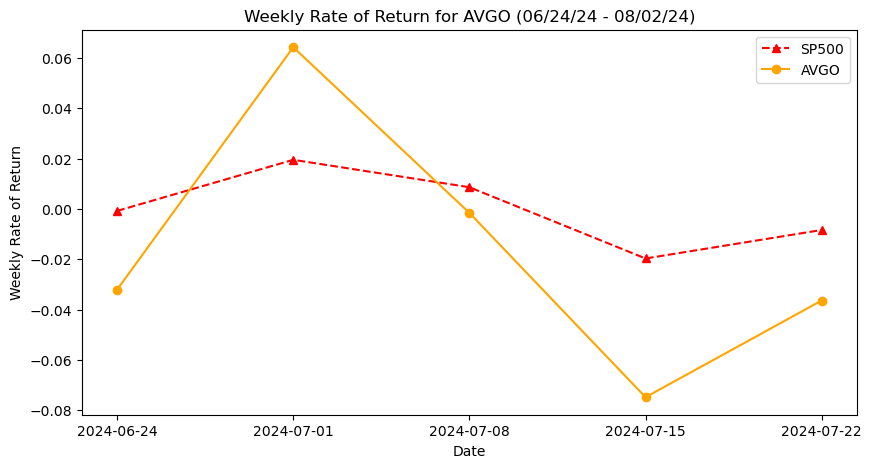

In [8]:
plt.figure(figsize=(10, 5))
dates_list = avgo_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, sp500_data['Weekly Return'], label='SP500', color = 'red', marker='^',linestyle='--')
plt.plot(dates_list, avgo_data['Weekly Return'], label='AVGO', color = 'orange', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Rate of Return')
plt.title('Weekly Rate of Return for AVGO (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

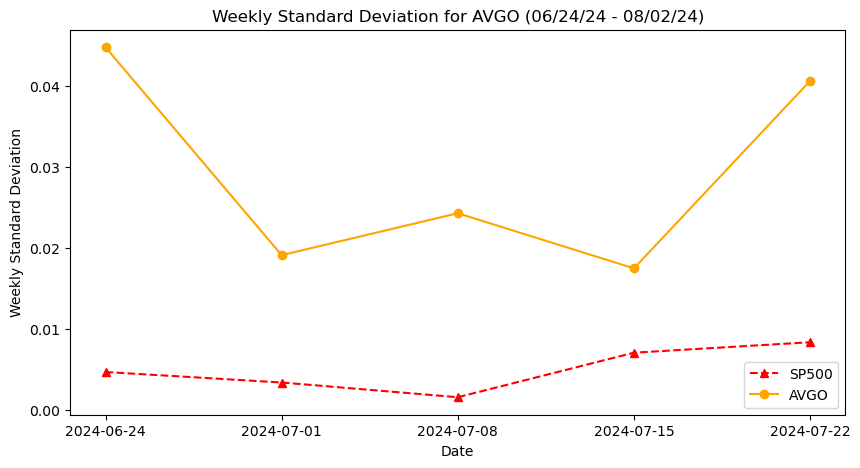

In [9]:
plt.figure(figsize=(10, 5))
dates_list = avgo_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, sp500_data['Weekly SD'], label='SP500', color = 'red', marker='^',linestyle='--')
plt.plot(dates_list, avgo_data['Weekly SD'], label='AVGO', color = 'orange', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Standard Deviation')
plt.title('Weekly Standard Deviation for AVGO (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

Our observations are as follows:

- **Volatility of AVGO:** AVGO exhibits higher volatility compared to the market. This is evident from the returns graph, where AVGO’s returns show more frequent and pronounced fluctuations. Additionally, the standard deviation of AVGO is consistently higher than that of the market, indicating greater variability in its returns. What is notable is that AVGO stock consistently moves in the same direction as the overall market. This positive correlation may suggest that AVGO's performance is closely tied to broader market trends.

- **Comparative Returns:** Despite the increased volatility, AVGO does not consistently deliver better returns than the market. The stock's returns were only significantly higher than the market for a single week. In contrast, for the majority of the period, AVGO's returns were lower than those of the market.

These observations suggest that while AVGO may offer higher risk (as indicated by its volatility), it does not necessarily provide superior returns compared to the market on a consistent basis.

__Beta__

Below is a plot illustrating the beta of the asset over the course of the semester. Beta measures an asset's volatility relative to the overall market. A beta of 1 indicates that the asset's price movements are in sync with the market. A beta greater than 1 signifies that the asset is more volatile than the market, experiencing larger price swings, whereas one less than 1 indicates that the asset is less volatile than the market, with smaller price fluctuations.

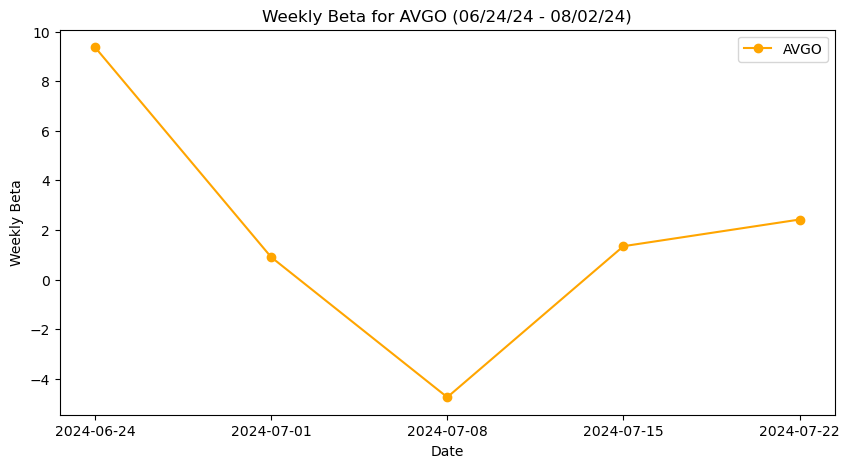

In [10]:
plt.figure(figsize=(10, 5))
dates_list = avgo_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, avgo_data['Weekly Beta'], label='AVGO', color = 'orange', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Beta')
plt.title('Weekly Beta for AVGO (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

Conclusions from the visualization are:

The plot reveals several key observations:

- **Beta Peaks:** On certain dates, the beta value reaches as high as 10, indicating a period of extremely high volatility relative to the market. This suggests that the asset experienced substantial price swings compared to the market on these dates.
  
- **Negative Beta:** On one particular date, the beta value drops significantly to -5. A negative beta means that the asset's price movements are inversely related to the market; in other words, the asset tends to move in the opposite direction of the market during these times. This can indicate a potential hedge against market movements or unusual market conditions.

- **General Trend:** For the majority of the period, the asset’s beta remains above 1, suggesting that its price movements are generally more volatile than overall market.

Overall, while there are instances of significant deviation, the asset primarily moves in tandem with the market. In the first code block we found that the overall beta for AVGO over the semester is $\beta_{avgo} = 2.7137$ which confirms this conclusion as well.

__Jensen Index__

The Jensen Index measures the excess return of an asset or portfolio relative to the expected return predicted by the Capital Asset Pricing Model (CAPM). It indicates how well the asset or portfolio has performed compared to the market, after adjusting for its risk level. A positive Jensen Index suggests that the asset has outperformed its expected return, while a negative value indicates underperformance. It offers a more comprehensive evaluation than simple return calculations. Below, we present a visualization of AVGO’s weekly Jensen Index over the course of our project:

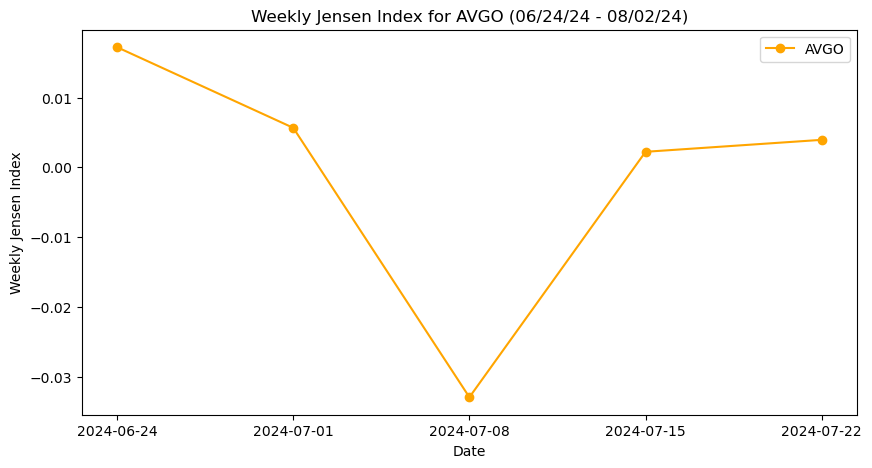

In [11]:
plt.figure(figsize=(10, 5))
dates_list = avgo_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, avgo_data['Weekly Jensen'], label='AVGO', color = 'orange', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Jensen Index')
plt.title('Weekly Jensen Index for AVGO (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

Conclusions from the Visualization:

- **Underperformance:** On one week, the Jensen Index falls below zero, indicating a period of underperformance where the asset's return was less than expected given its risk profile.

- **General Performance:** For the majority of the weeks, the Jensen Index is slightly above zero, indicating that the asset's performance marginally exceeds what would be expected based on its risk level.

In summary, while the asset generally performs in line with or slightly above expectations, there are moments of significant negative deviation, demonstrating periods of underperformance. The calculated overall Jensen Index over the course of our project is $J_{avgo} = 0.0171228$ which is in line with this conclusion as well. 

__Sharpe Ratio__

The Sharpe Ratio is a measure used to evaluate the risk-adjusted return of an investment. It helps investors understand how much excess return they are receiving for the extra volatility that they endure for holding a riskier asset. Below we visualization AVGO's Sharpe Ratio per week. 

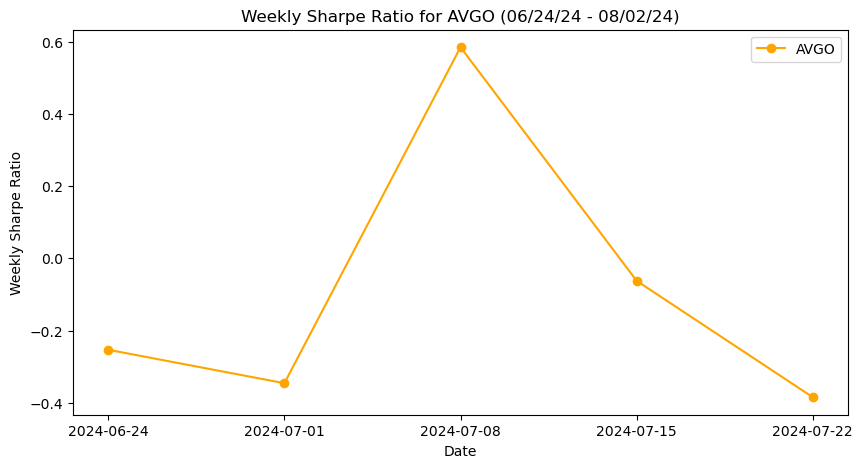

In [12]:
plt.figure(figsize=(10, 5))
dates_list = avgo_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, avgo_data['Weekly Sharpe'], label='AVGO', color = 'orange', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Sharpe Ratio')
plt.title('Weekly Sharpe Ratio for AVGO (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

Conclusions Visualization:

* __Negative Sharpe Ratios__: On most dates, the Sharpe Ratio for AVGO is below 0. This indicates that the risk-adjusted returns were not sufficient to surpass the risk-free rate, suggesting underperformance relative to risk-free investments.

* __Positive Sharpe Ratio__: There is one specific date where the Sharpe Ratio is above 0, indicating that, on this date, AVGO delivered positive risk-adjusted returns that exceeded the risk-free rate, demonstrating outperformance relative to risk-free investments.

Overall, the visualization suggests that AVGO generally underperforms when accounting for the volatility of its returns. Our previous calculations for the Sharpe Ratio over the course of this project $S_{avgo} = -0.54066$ corroborates this account. 

__Value at Risk__


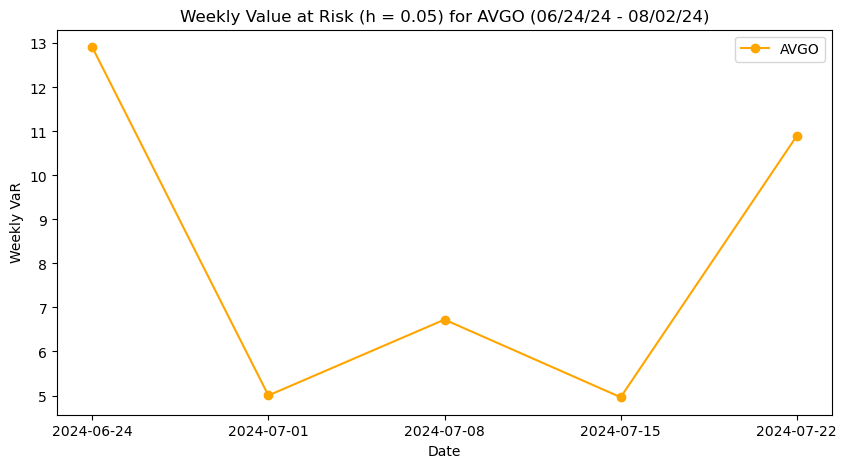

In [13]:
plt.figure(figsize=(10, 5))
dates_list = avgo_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, avgo_data['Weekly VaR'], label='AVGO', color = 'orange', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly VaR')
plt.title('Weekly Value at Risk (h = 0.05) for AVGO (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

Value at Risk (VaR) is a statistical measure used to quantify the potential loss in value of a financial asset or portfolio over a specific time period for a given confidence interval. In our case, the period our VaR is measured at is on a weekly basis as well as over the course of our project. Our confidence level is set to 95%. This means there's a 5% chance that the loss will exceed the VaR threshold. One thing to note, our VaR is based on the stock price and it can be scaled to match the number of stocks purchased. 

We can see the weekly VaR in the visualization above. Each value represents the maximum expected loss for the specified week, beyond which the probability of a loss exceeding this value is at 5% chance. Variability in VaR can indicate periods of increased or decreased risk. For example, the VaR decreases significantly in the second week, it may be due to decreased market volatility or other factors affecting the asset’s risk profile.

The overall VaR of AVGO stock over the course of our project is $VaR_{avgo} = 8.3612$, which means that, with 95% confidence, the loss for AVGO over the next month will not exceed 8.3612. Conversely, there is a 5% chance that the loss will be greater than 8.3612 over that period.

#### Fidelity Blue Chip Growth Fund (FBGRX)
In the following section, we will collect data and calculate KPIs for Fidelity's Blue Chip Growth Fund starting from Module 4 (06/24/24) and ending in Module 10 (present day). 

In [14]:
# get weekly data and KPIs
fbgrx_week_data = yf.download('FBGRX', start=start_date, end=end_date, interval='1wk')
fbgrx_week_data['Weekly Return'] = fbgrx_week_data['Adj Close'].pct_change()

# get daily data 
fbgrx_day_data = yf.download('FBGRX', start=start_date, end=end_date, interval='1d')
fbgrx_day_data['Daily Return'] = fbgrx_day_data['Adj Close'].pct_change()

# calculate standard deviation, store in weekly df
weekly_std_dev = fbgrx_day_data['Daily Return'].resample('W').std()
dates = pd.date_range(start='2024-06-16', end='2024-07-28', freq='W')  # Weekly frequency
std_dev_series = pd.Series(weekly_std_dev, index=dates, name='Weekly SD')
std_dev_series = std_dev_series.reindex(fbgrx_week_data.index, method='ffill')  # Forward-fill NaNs if needed
fbgrx_week_data['Weekly SD'] = std_dev_series

# calculate average return, store in weekly df
weekly_avg = fbgrx_day_data['Daily Return'].resample('W').mean()
avg_series = pd.Series(weekly_avg, index=dates, name='Weekly Avg Return')
avg_series = avg_series.reindex(sp500_week_data.index, method='ffill')  # Forward-fill NaNs if needed
fbgrx_week_data['Weekly Avg Return'] = avg_series

# calculate average price, store in weekly df
weekly_price_avg = fbgrx_day_data['Adj Close'].resample('W').mean()
avg_price_series = pd.Series(weekly_price_avg, index=dates, name='Weekly Avg Price')
avg_price_series = avg_price_series.reindex(sp500_week_data.index, method='ffill')  # Forward-fill NaNs if needed
fbgrx_week_data['Weekly Avg Price'] = avg_price_series

# calculate covariance with market, store in weekly df
weekly_cov_list= []
# calculate covariance, store in weekly df
for i in range(1, len(dates)):
    week_start = dates[i-1]
    week_end = dates[i]
    
    # Filter data for the current week
    stock_week_data = fbgrx_day_data[(fbgrx_day_data.index >= week_start) & (fbgrx_day_data.index < week_end)]
    market_week_data = sp500_day_data[(sp500_day_data.index >= week_start) & (sp500_day_data.index < week_end)]
    
    # Calculate weekly covariance
    if len(stock_week_data) > 0 and len(market_week_data) > 0:
        covariance = stock_week_data['Daily Return'].cov(market_week_data['Daily Return'])
    else:
        covariance = None
    
    # Append the result to the list
    weekly_cov_list.append(covariance)

cov_series = pd.Series(weekly_cov_list, index=dates[1:], name='Weekly Cov')
cov_series = cov_series.reindex(fbgrx_week_data.index, method='ffill')  # Forward-fill NaNs if needed
fbgrx_week_data['Weekly Cov'] = cov_series

# calculate Weekly Beta 
fbgrx_week_data['Weekly Beta'] = fbgrx_week_data['Weekly Cov']/(sp500_week_data['Weekly SD']**2)

# calculate Weekly Jensen Index
fbgrx_week_data['Weekly Jensen'] = fbgrx_week_data['Weekly Beta']*((sp500_week_data['Weekly Avg Return']) - 0.000898) - (fbgrx_week_data['Weekly Avg Return'] - 0.000898)

# calculate Sharpe Ratio 
fbgrx_week_data['Weekly Sharpe'] = (fbgrx_week_data['Weekly Avg Return'] - 0.000898)/fbgrx_week_data['Weekly SD']

# calculate VaR
fbgrx_week_data['Weekly VaR'] = -1 * fbgrx_week_data['Weekly SD'] * quantile_value * fbgrx_week_data['Weekly Avg Price']

fbgrx_data = fbgrx_week_data[['Adj Close','Weekly Return', 'Weekly Avg Price', 'Weekly Avg Return', 'Weekly SD', 
                            'Weekly Beta', 'Weekly Jensen', 'Weekly Sharpe', 'Weekly VaR']].tail(5)
# calculate total return 
start_price = fbgrx_data['Adj Close'].iloc[0]
end_price = fbgrx_data['Adj Close'].iloc[-1]
total_return_fbgrx = (end_price - start_price)/start_price

# calculate total sd
std_fbgrx = fbgrx_day_data['Daily Return'].std()

# Calculate overall beta 
cov_daily_sp500_fbgrx = fbgrx_day_data['Daily Return'].cov(sp500_day_data['Daily Return'])
# print("cov_daily_sp500_fbgrx",cov_daily_sp500_fbgrx)
beta_fbgrx = cov_daily_sp500_fbgrx/sp500_daily_var

# Calculate overall Jensen
jensen_fbgrx = beta_fbgrx*(sp500_week_data['Weekly Return'].mean() - 0.0038986) - (fbgrx_week_data['Weekly Return'].mean()- 0.0038986)

# Calculate overall Sharpe 
sharpe_fbgrx = (fbgrx_week_data['Weekly Return'].mean() - 0.0038986)/fbgrx_week_data['Weekly Return'].std()

# Calculate overall VaR
var_fbgrx = -1 * std_fbgrx*quantile_value * fbgrx_data['Adj Close'].mean()

overall_kpis.loc[len(overall_kpis)] = ['FBGRX', round(total_return_fbgrx, 4), round(std_fbgrx, 4), round(beta_fbgrx, 4), round(jensen_fbgrx, 4), round(sharpe_fbgrx, 4), round(var_fbgrx, 4)]
display(overall_kpis.tail(1))
display(fbgrx_data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,stock,return,standard deviation,beta,jensen index,sharpe ratio,VaR (h=.05)
2,FBGRX,-0.0462,0.0129,1.5851,0.0067,-0.4524,4.6489


,Adj Close,Weekly Return,Weekly Avg Price,Weekly Avg Return,Weekly SD,Weekly Beta,Weekly Jensen,Weekly Sharpe,Weekly VaR
Date,,,,,,,,,
2024-06-24,220.000000,0.003329,220.617500,-0.000803,0.006664,1.314555,0.002524,-0.255179,2.418295
2024-07-01,226.050003,0.027500,219.710001,0.000721,0.011797,3.357586,-0.003332,-0.015039,4.263380
2024-07-08,225.820007,-0.001017,223.542503,0.006806,0.001309,0.047070,-0.005722,4.514060,0.481227
2024-07-15,215.500000,-0.045700,226.702002,-0.000145,0.012022,1.628668,0.002421,-0.086779,4.482878
2024-07-22,209.839996,-0.026265,220.756003,-0.009224,0.014676,1.516980,0.002792,-0.689682,5.329124


__Weekly Rate of Return & Standard Deviation__

Below, we present visualizations that plot both the rate of return and the standard deviation for FBGRX, compared to the market's performance. These plots allow us to evaluate FBGRX’s relative performance and risk. Ideally, we seek consistently positive returns that align with an acceptable level of volatility and risk.

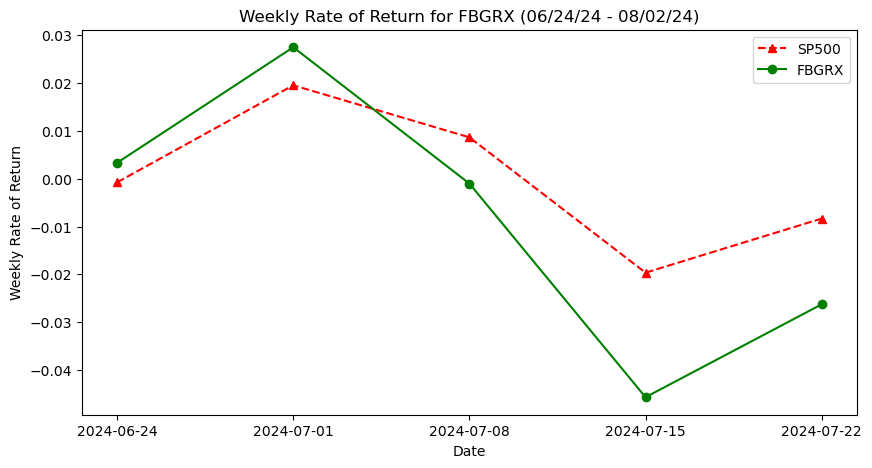

In [15]:
plt.figure(figsize=(10, 5))
dates_list = fbgrx_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, sp500_data['Weekly Return'], label='SP500', color = 'red', marker='^',linestyle='--')
plt.plot(dates_list, fbgrx_data['Weekly Return'], label='FBGRX', color = 'green', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Rate of Return')
plt.title('Weekly Rate of Return for FBGRX (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

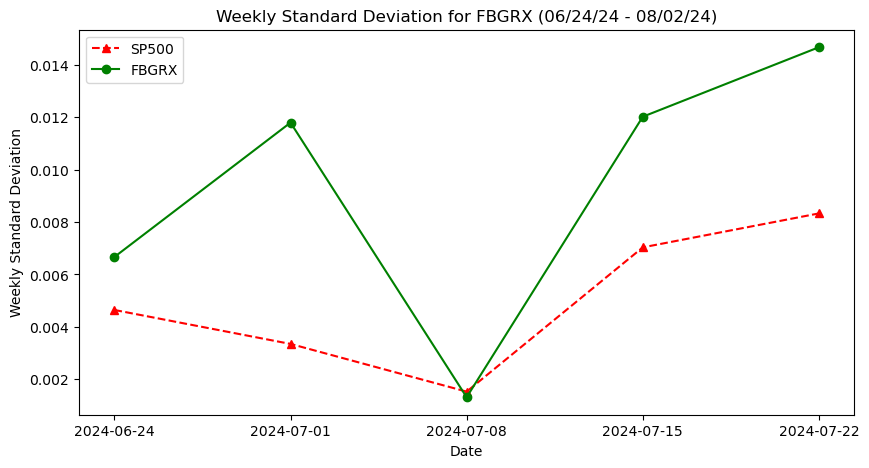

In [16]:
plt.figure(figsize=(10, 5))
dates_list = fbgrx_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, sp500_data['Weekly SD'], label='SP500', color = 'red', marker='^',linestyle='--')
plt.plot(dates_list, fbgrx_data['Weekly SD'], label='FBGRX', color = 'green', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Standard Deviation')
plt.title('Weekly Standard Deviation for FBGRX (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

Conclusions taken from data and visualizations:
* __Briefly outperformed market__: For two weeks, FBGRX outperformed the market, as we can see in the weekly returns graph. However, this period of outperformance was followed by underperformance relative to the market.

* __Higher Volatility__: Additionally, the volatility of FBGRX is higher than that of the market, as shown in the standard deviation graph. Except for one week where the standard deviation was slightly lower than the market, FBGRX consistently exhibited greater volatility.

FBGRX demonstrated short-term periods of outperformance but ultimately exhibited greater volatility and periods of underperformance compared to the market.

__Beta__

In this section, we will analyze FBGRX's beta throughout the duration of our project. Beta measures a stock's volatility relative to the overall market. A beta greater than 1 indicates that the stock is more volatile than the market, while a beta less than 1 indicates that the stock is less. We seek to understand how FBGRX's movements correspond to market fluctuations and to determine its level of systematic risk. Line graphs of FBGRX's weekly Beta are presented below:

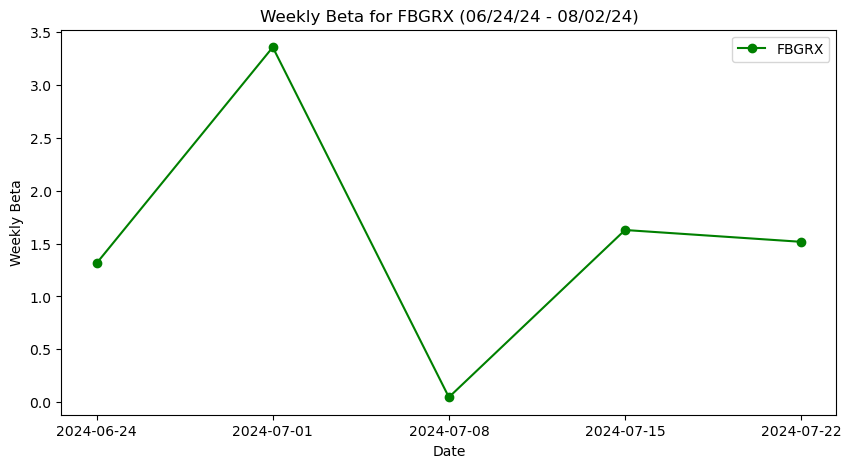

In [17]:
plt.figure(figsize=(10, 5))
dates_list = fbgrx_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, fbgrx_data['Weekly Beta'], label='FBGRX', color = 'green', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Beta')
plt.title('Weekly Beta for FBGRX (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

Conclusions from visualization:
- __Consistently high volatility__: Throughout the duration of our projhect, FBGRX exhibited a weekly beta value greater than 1, indicating that it is more volatile than the overall market. Only in one week did the beta drop below 1.

FBGRX's higher beta values suggest that the fund is more sensitive to market movements, experiencing greater fluctuations in response to market changes. This higher volatility can lead to greater potential returns but also increased risk. Investors should consider this elevated level of systematic risk when making investment decisions regarding FBGRX. Our overall Beta for the duration of our project also confirms this conclusion with a value of $\beta_{fbgrx} = 1.585$

__Jensen Index__

Next, we plot the Jensen Index for FBGRX. The Jensen Index measures the excess return of an investment relative to the expected return based on its beta and the average market return. A positive Jensen Index indicates that the investment has performed better than expected given its risk, so we are ideally looking for consistently positive values.

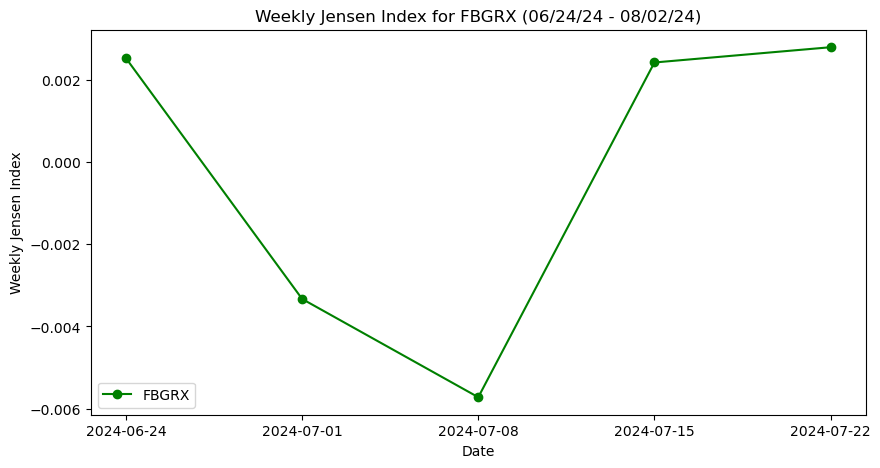

In [18]:
plt.figure(figsize=(10, 5))
dates_list = fbgrx_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, fbgrx_data['Weekly Jensen'], label='FBGRX', color = 'green', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Jensen Index')
plt.title('Weekly Jensen Index for FBGRX (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

Summary of Observations:
- FBGRX experienced two weeks with a negative Jensen Index, indicating underperformance relative to expectations.
- For the remaining weeks, the Jensen Index values were positive, averaging around 0.002.

Overall, FBGRX generally performed slightly better than expected based on its risk profile, with most periods showing a modest positive Jensen Index. However, there were brief periods of underperformance. Our overall Jensen Index has a value of $J_{fbgrx} = 0.00675$. This coincides with our weekly data. 

__Sharpe Ratio__

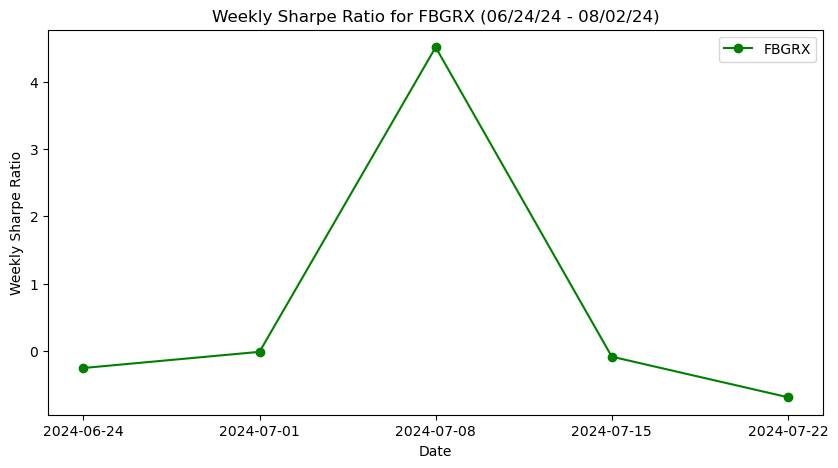

In [19]:
plt.figure(figsize=(10, 5))
dates_list = fbgrx_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, fbgrx_data['Weekly Sharpe'], label='FBGRX', color = 'green', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Sharpe Ratio')
plt.title('Weekly Sharpe Ratio for FBGRX (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

__Value at Risk__

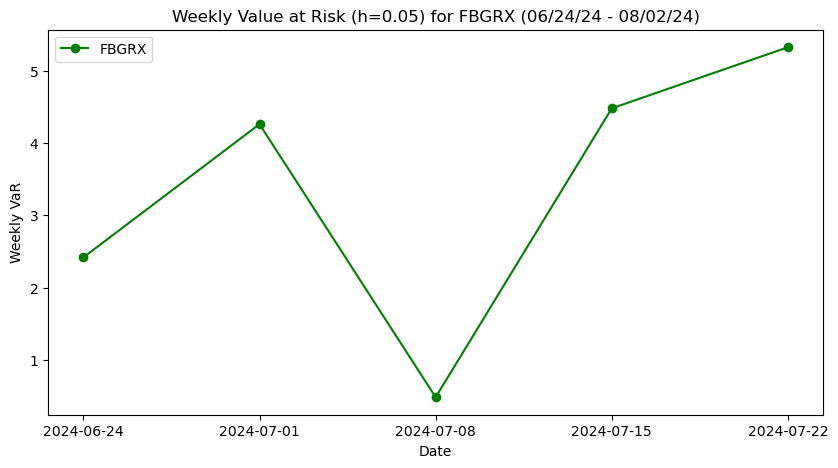

In [20]:
plt.figure(figsize=(10, 5))
dates_list = fbgrx_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, fbgrx_data['Weekly VaR'], label='FBGRX', color = 'green', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly VaR')
plt.title('Weekly Value at Risk (h=0.05) for FBGRX (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

Above is the weekly VaR amount per FBGRX stock purchased. 

A VaR of $VaR_{fbgrx} = 4.65$ at a 5% confidence level for purchasing one stock of FBGRX over one month means there is a 5% chance that the loss will exceed 4.65 per stock in the next month. This measure helps investors understand the potential downside risk, and they should be prepared for potential losses up to $4.65, with a 5% chance of exceeding this amount.

#### Google (GOOGL)
In the following section, we will collect and process data for Google's stock starting from Module 4 (06/24/24) and ending in Module 10 (present day). 

In [21]:
# get weekly data and KPIs
googl_week_data = yf.download('GOOGL', start=start_date, end=end_date, interval='1wk')
googl_week_data['Weekly Return'] = googl_week_data['Adj Close'].pct_change()

# get daily data 
googl_day_data = yf.download('GOOGL', start=start_date, end=end_date, interval='1d')
googl_day_data['Daily Return'] = googl_day_data['Adj Close'].pct_change()

# calculate standard deviation, store in weekly df
weekly_std_dev = googl_day_data['Daily Return'].resample('W').std()
dates = pd.date_range(start='2024-06-16', end='2024-07-28', freq='W')  # Weekly frequency
std_dev_series = pd.Series(weekly_std_dev, index=dates, name='Weekly SD')
std_dev_series = std_dev_series.reindex(googl_week_data.index, method='ffill')  # Forward-fill NaNs if needed
googl_week_data['Weekly SD'] = std_dev_series

# calculate average return, store in weekly df
weekly_avg = googl_day_data['Daily Return'].resample('W').mean()
avg_series = pd.Series(weekly_avg, index=dates, name='Weekly Avg Return')
avg_series = avg_series.reindex(sp500_week_data.index, method='ffill')  # Forward-fill NaNs if needed
googl_week_data['Weekly Avg Return'] = avg_series

# calculate average price, store in weekly df
weekly_price_avg = googl_day_data['Adj Close'].resample('W').mean()
avg_price_series = pd.Series(weekly_price_avg, index=dates, name='Weekly Avg Price')
avg_price_series = avg_price_series.reindex(sp500_week_data.index, method='ffill')  # Forward-fill NaNs if needed
googl_week_data['Weekly Avg Price'] = avg_price_series

# calculate covariance with market, store in weekly df
weekly_cov_list= []
# calculate covariance, store in weekly df
for i in range(1, len(dates)):
    week_start = dates[i-1]
    week_end = dates[i]
    
    # Filter data for the current week
    stock_week_data = googl_day_data[(googl_day_data.index >= week_start) & (googl_day_data.index < week_end)]
    market_week_data = sp500_day_data[(sp500_day_data.index >= week_start) & (sp500_day_data.index < week_end)]
    
    # Calculate weekly covariance
    if len(stock_week_data) > 0 and len(market_week_data) > 0:
        covariance = stock_week_data['Daily Return'].cov(market_week_data['Daily Return'])
    else:
        covariance = None
    
    # Append the result to the list
    weekly_cov_list.append(covariance)

cov_series = pd.Series(weekly_cov_list, index=dates[1:], name='Weekly Cov')
cov_series = cov_series.reindex(googl_week_data.index, method='ffill')  # Forward-fill NaNs if needed
googl_week_data['Weekly Cov'] = cov_series

# calculate Weekly Beta 
googl_week_data['Weekly Beta'] = googl_week_data['Weekly Cov']/(sp500_week_data['Weekly SD']**2)

# calculate Weekly Jensen Index
googl_week_data['Weekly Jensen'] = googl_week_data['Weekly Beta']*((sp500_week_data['Weekly Avg Return']) - 0.000898) - (googl_week_data['Weekly Avg Return'] - 0.000898)

# calculate Sharpe Ratio 
googl_week_data['Weekly Sharpe'] = (googl_week_data['Weekly Avg Return'] - 0.000898)/googl_week_data['Weekly SD']

# calculate VaR
googl_week_data['Weekly VaR'] = -1 * googl_week_data['Weekly SD'] * quantile_value * googl_week_data['Weekly Avg Price']

googl_data = googl_week_data[['Adj Close','Weekly Return', 'Weekly Avg Price', 'Weekly Avg Return', 'Weekly SD', 
                            'Weekly Beta', 'Weekly Jensen', 'Weekly Sharpe', 'Weekly VaR']].tail(5)
# calculate total return 
start_price = googl_data['Adj Close'].iloc[0]
end_price = googl_data['Adj Close'].iloc[-1]
total_return_googl = (end_price - start_price)/start_price

# calculate total sd
std_googl = googl_day_data['Daily Return'].std()

# Calculate overall beta 
cov_daily_sp500_googl = googl_day_data['Daily Return'].cov(sp500_day_data['Daily Return'])
# print("cov_daily_sp500_googl",cov_daily_sp500_googl)
beta_googl = cov_daily_sp500_googl/sp500_daily_var

# Calculate overall Jensen
jensen_googl = beta_googl*(sp500_week_data['Weekly Return'].mean() - 0.0038986) - (googl_week_data['Weekly Return'].mean()- 0.0038986)

# Calculate overall Sharpe 
sharpe_googl = (googl_week_data['Weekly Return'].mean() - 0.0038986)/googl_week_data['Weekly Return'].std()

# Calculate overall VaR
var_googl = -1 * std_googl*quantile_value * googl_data['Adj Close'].mean()

overall_kpis.loc[len(overall_kpis)] = ['GOOGL', round(total_return_googl, 4), round(std_googl, 4), round(beta_googl, 4), round(jensen_googl, 4), round(sharpe_googl, 4), round(var_googl, 4)]
display(overall_kpis.tail(1))
display(googl_data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,stock,return,standard deviation,beta,jensen index,sharpe ratio,VaR (h=.05)
3,GOOGL,-0.0832,0.0174,1.6225,0.0076,-0.3069,5.1598


,Adj Close,Weekly Return,Weekly Avg Price,Weekly Avg Return,Weekly SD,Weekly Beta,Weekly Jensen,Weekly Sharpe,Weekly VaR
Date,,,,,,,,,
2024-06-24,182.149994,0.014029,177.065002,0.004054,0.012812,-1.280530,-0.003958,0.246296,3.731399
2024-07-01,190.600006,0.046390,182.938000,0.002896,0.016299,4.309361,-0.006501,0.122570,4.904487
2024-07-08,185.070007,-0.029014,186.162506,0.011441,0.010335,3.251620,0.002311,1.020105,3.164619
2024-07-15,177.660004,-0.040039,187.966000,-0.005780,0.015040,2.037026,0.008401,-0.444013,4.649864
2024-07-22,167.000000,-0.060002,181.364001,-0.008087,0.011380,0.498849,0.006575,-0.789523,3.394999


__Weekly Rate of Return & Standard Deviation__

In the following section we analyze the weekly rate of return and standard deviation for GOOGL.

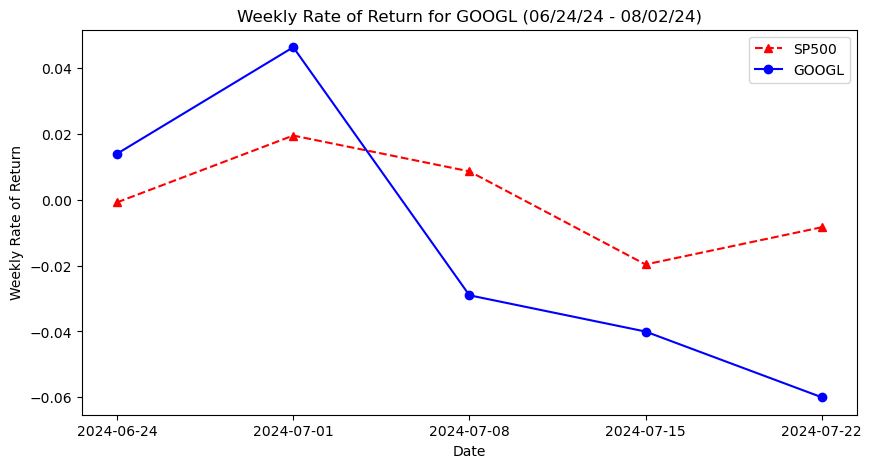

In [22]:
plt.figure(figsize=(10, 5))
dates_list = googl_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, sp500_data['Weekly Return'], label='SP500', color = 'red', marker='^',linestyle='--')
plt.plot(dates_list, googl_data['Weekly Return'], label='GOOGL', color = 'blue', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Rate of Return')
plt.title('Weekly Rate of Return for GOOGL (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

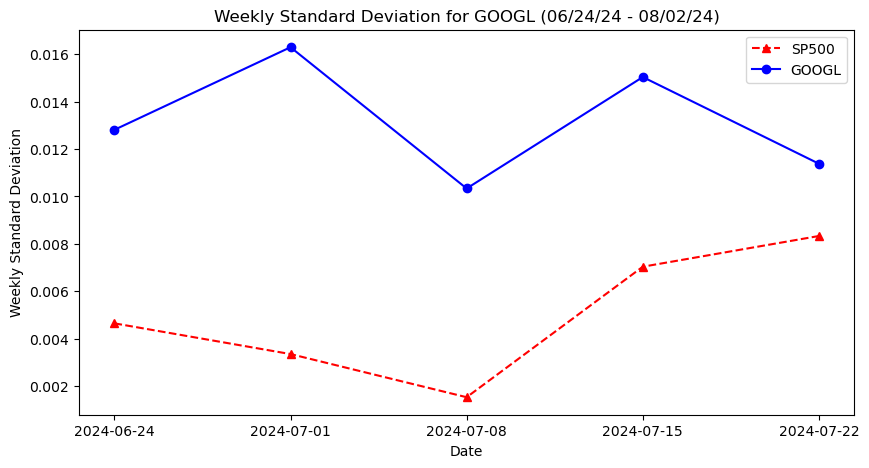

In [23]:
plt.figure(figsize=(10, 5))
dates_list = googl_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, sp500_data['Weekly SD'], label='SP500', color = 'red', marker='^',linestyle='--')
plt.plot(dates_list, googl_data['Weekly SD'], label='GOOGL', color = 'blue', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Standard Deviation')
plt.title('Weekly Standard Deviation for GOOGL (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

Summary of Visualizations:
- For the first two weeks, the weekly rate of return for Google is higher than the overall market, but afterwards falls below the market rate.
- Google's standard deviation is consistently higher than that of the market throughout the observed period.

Investors might view Google as a riskier investment compared to the broader market due to its higher volatility. While higher volatility can mean higher potential returns, it also implies higher risk. Investors need to weigh this risk against potential rewards when considering Google as part of their portfolio. The initial outperformance followed by underperformance may suggest that short-term gains were not sustained. The overall return of $r = -0.08$ corroborates this account.

__Beta__

Next, we analyze GOOGL's Beta. 

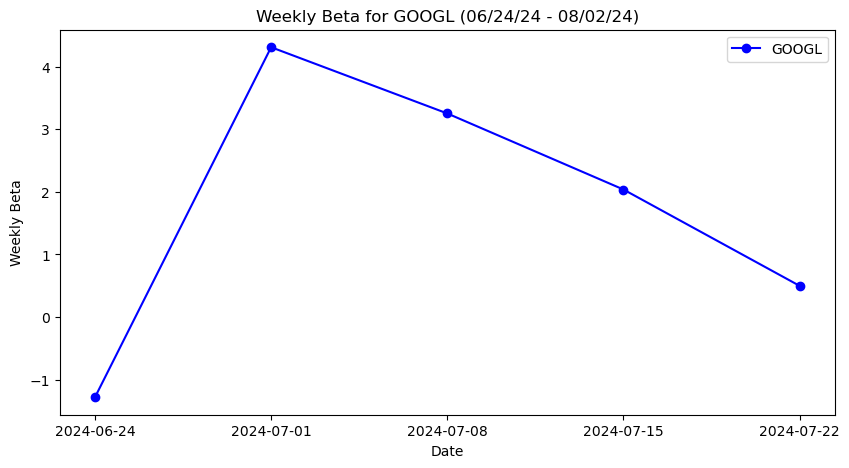

In [24]:
plt.figure(figsize=(10, 5))
dates_list = googl_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, googl_data['Weekly Beta'], label='GOOGL', color = 'blue', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Beta')
plt.title('Weekly Beta for GOOGL (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

Observations from Data:
- Google's beta is consistently above 1, indicating that it is generally more volatile than the market.
- It falls below 1 only once, suggesting a brief period of lower relative volatility.
- It drops below 0 on one occasion, which implies a rare period of negative correlation with the market.
  
The consistently high beta signifies that Google's stock tends to be more volatile than the market. The overall Beta measures to be $\beta_{googl} = 1.6225$, and confirms this fact

__Jensen Index__

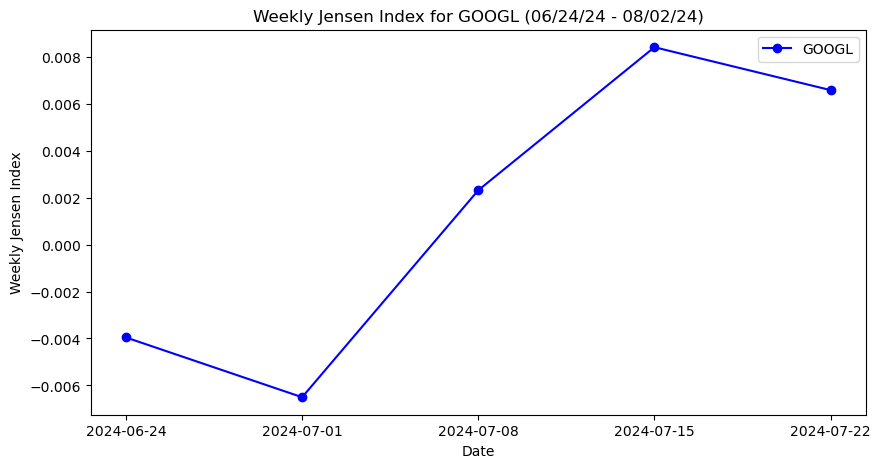

In [25]:
plt.figure(figsize=(10, 5))
dates_list = googl_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, googl_data['Weekly Jensen'], label='GOOGL', color = 'blue', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Jensen Index')
plt.title('Weekly Jensen Index for GOOGL (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

Observations from Data:

- The Jensen Index ranges from -0.006 to 0.008.
- Google's Jensen Index is negative for two weeks and positive for the remaining weeks.

The Jensen Index values indicate that, over the observed period, Google's returns have generally exceeded the expected returns based on its beta and the market's performance. The overall Jensen Index is measured at $J_{googl} = 0.00763$, and this confirms our weekly observations. 

__Sharpe Ratio__

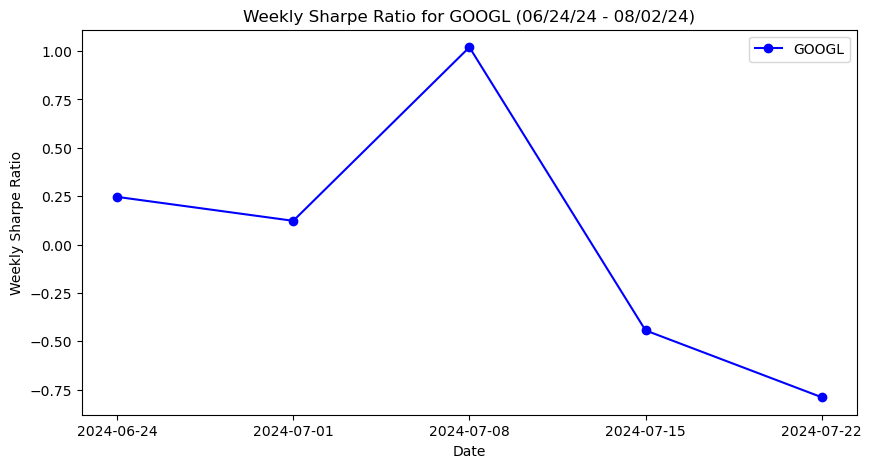

In [26]:
plt.figure(figsize=(10, 5))
dates_list = googl_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, googl_data['Weekly Sharpe'], label='GOOGL', color = 'blue', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Sharpe Ratio')
plt.title('Weekly Sharpe Ratio for GOOGL (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

Observations from Data:
- The Jensen Index is positive for three weeks.
- It subsequently falls below 0 for the remaining period.

The positive Jensen Index for the initial three weeks indicates that Google's stock performed better than expected based on its risk level and the market’s performance. The subsequent decline implies that GOOGL underperformed relative to expectations, reflecting a period where the returns did not meet the anticipated level given the associated risk. The overall Sharpe Ratio is $S_{googl} = -0.3068$ which means that, after accounting for volatility, the returns on Google's stock are less than the risk-free rate, implying poor performance relative to the level of risk taken.

__Value at Risk__

Google stock has a value at risk of $\text{VaR}_{googl} = 5.16$ at a 5% confidence level over one month. This means there is a 5% chance that the loss will exceed 5.16 per stock in the next month. This measure helps investors understand the potential downside risk, and they should be prepared for potential losses up to $5.16, with a 5% chance of exceeding this amount.

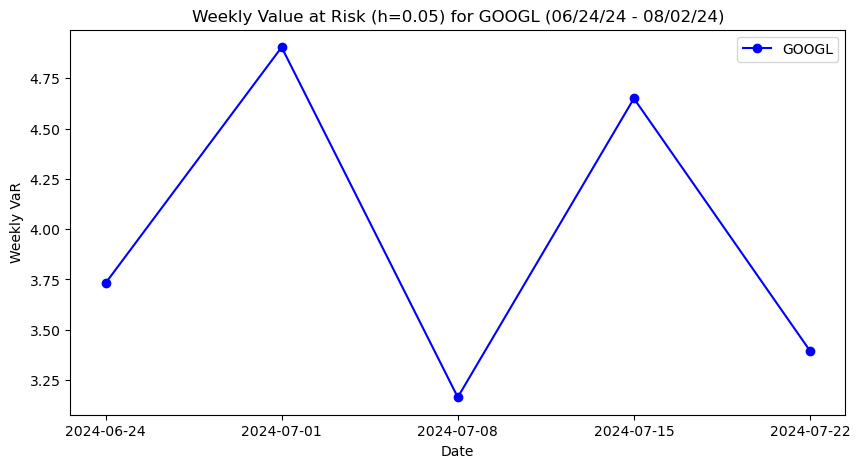

In [27]:
plt.figure(figsize=(10, 5))
dates_list = googl_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, googl_data['Weekly VaR'], label='GOOGL', color = 'blue', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly VaR')
plt.title('Weekly Value at Risk (h=0.05) for GOOGL (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

#### Intuitive Surgical Inc (ISRG)
Next, we will collect and process data for Intuitive's stock starting from Module 4 (06/24/24) and ending in Module 10 (present day). 

In [28]:
# get weekly data and KPIs
isrg_week_data = yf.download('ISRG', start=start_date, end=end_date, interval='1wk')
isrg_week_data['Weekly Return'] = isrg_week_data['Adj Close'].pct_change()

# get daily data 
isrg_day_data = yf.download('ISRG', start=start_date, end=end_date, interval='1d')
isrg_day_data['Daily Return'] = isrg_day_data['Adj Close'].pct_change()

# calculate standard deviation, store in weekly df
weekly_std_dev = isrg_day_data['Daily Return'].resample('W').std()
dates = pd.date_range(start='2024-06-16', end='2024-07-28', freq='W')  # Weekly frequency
std_dev_series = pd.Series(weekly_std_dev, index=dates, name='Weekly SD')
std_dev_series = std_dev_series.reindex(isrg_week_data.index, method='ffill')  # Forward-fill NaNs if needed
isrg_week_data['Weekly SD'] = std_dev_series

# calculate average return, store in weekly df
weekly_avg = isrg_day_data['Daily Return'].resample('W').mean()
avg_series = pd.Series(weekly_avg, index=dates, name='Weekly Avg Return')
avg_series = avg_series.reindex(sp500_week_data.index, method='ffill')  # Forward-fill NaNs if needed
isrg_week_data['Weekly Avg Return'] = avg_series

# calculate average price, store in weekly df
weekly_price_avg = isrg_day_data['Adj Close'].resample('W').mean()
avg_price_series = pd.Series(weekly_price_avg, index=dates, name='Weekly Avg Price')
avg_price_series = avg_price_series.reindex(sp500_week_data.index, method='ffill')  # Forward-fill NaNs if needed
isrg_week_data['Weekly Avg Price'] = avg_price_series

# calculate covariance with market, store in weekly df
weekly_cov_list= []
# calculate covariance, store in weekly df
for i in range(1, len(dates)):
    week_start = dates[i-1]
    week_end = dates[i]
    
    # Filter data for the current week
    stock_week_data = isrg_day_data[(isrg_day_data.index >= week_start) & (isrg_day_data.index < week_end)]
    market_week_data = sp500_day_data[(sp500_day_data.index >= week_start) & (sp500_day_data.index < week_end)]
    
    # Calculate weekly covariance
    if len(stock_week_data) > 0 and len(market_week_data) > 0:
        covariance = stock_week_data['Daily Return'].cov(market_week_data['Daily Return'])
    else:
        covariance = None
    
    # Append the result to the list
    weekly_cov_list.append(covariance)

cov_series = pd.Series(weekly_cov_list, index=dates[1:], name='Weekly Cov')
cov_series = cov_series.reindex(isrg_week_data.index, method='ffill')  # Forward-fill NaNs if needed
isrg_week_data['Weekly Cov'] = cov_series

# calculate total sd
std_isrg = isrg_day_data['Daily Return'].std()

# calculate Weekly Beta 
isrg_week_data['Weekly Beta'] = isrg_week_data['Weekly Cov']/(sp500_week_data['Weekly SD']**2)

# calculate Weekly Jensen Index
isrg_week_data['Weekly Jensen'] = isrg_week_data['Weekly Beta']*((sp500_week_data['Weekly Avg Return']) - 0.000898) - (isrg_week_data['Weekly Avg Return'] - 0.000898)

# calculate Sharpe Ratio 
isrg_week_data['Weekly Sharpe'] = (isrg_week_data['Weekly Avg Return'] - 0.000898)/isrg_week_data['Weekly SD']

# calculate VaR
isrg_week_data['Weekly VaR'] = -1 * isrg_week_data['Weekly SD'] * quantile_value * isrg_week_data['Weekly Avg Price']

isrg_data = isrg_week_data[['Adj Close','Weekly Return', 'Weekly Avg Price', 'Weekly Avg Return', 'Weekly SD', 
                            'Weekly Beta', 'Weekly Jensen', 'Weekly Sharpe', 'Weekly VaR']].tail(5)

# calculate total return 
start_price = isrg_data['Adj Close'].iloc[0]
end_price = isrg_data['Adj Close'].iloc[-1]
total_return_isrg = (end_price - start_price)/start_price

# Calculate overall beta 
cov_daily_sp500_isrg = isrg_day_data['Daily Return'].cov(sp500_day_data['Daily Return'])
# print("cov_daily_sp500_isrg",cov_daily_sp500_isrg)
beta_isrg = cov_daily_sp500_isrg/sp500_daily_var

# Calculate overall Jensen
jensen_isrg = beta_isrg*(sp500_week_data['Weekly Return'].mean() - 0.0038986) - (isrg_week_data['Weekly Return'].mean()- 0.0038986)

# Calculate overall Sharpe 
sharpe_isrg = (isrg_week_data['Weekly Return'].mean() - 0.0038986)/isrg_week_data['Weekly Return'].std()

# Calculate overall VaR
var_isrg = -1 * std_isrg*quantile_value * isrg_data['Adj Close'].mean()

overall_kpis.loc[len(overall_kpis)] = ['ISRG', round(total_return_isrg, 4), round(std_isrg, 4), round(beta_isrg, 4), round(jensen_isrg, 4), round(sharpe_isrg, 4), round(var_isrg, 4)]

display(overall_kpis.tail(1))
display(isrg_data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,stock,return,standard deviation,beta,jensen index,sharpe ratio,VaR (h=.05)
4,ISRG,-0.008,0.0227,0.4963,-0.0038,0.1054,16.6513


,Adj Close,Weekly Return,Weekly Avg Price,Weekly Avg Return,Weekly SD,Weekly Beta,Weekly Jensen,Weekly Sharpe,Weekly VaR
Date,,,,,,,,,
2024-06-24,444.850006,0.028412,432.527496,0.003983,0.008200,1.472920,-0.002162,0.376159,5.833862
2024-07-01,443.760010,-0.002450,440.773999,0.005707,0.014949,3.561331,-0.008531,0.321698,10.838001
2024-07-08,444.160004,0.000901,438.404999,-0.000499,0.017465,8.660154,0.035631,-0.079979,12.594412
2024-07-15,455.010010,0.024428,443.845996,0.000187,0.004136,0.431590,0.001076,-0.171896,3.019471
2024-07-22,441.299988,-0.030131,434.528009,0.005804,0.050212,-0.093852,-0.004452,0.097704,35.888341


__Weekly Rate of Return and Standard Deviation__

In this section, we will analyze the weekly returns and standard deviation for Intuitive Surgical's stock.

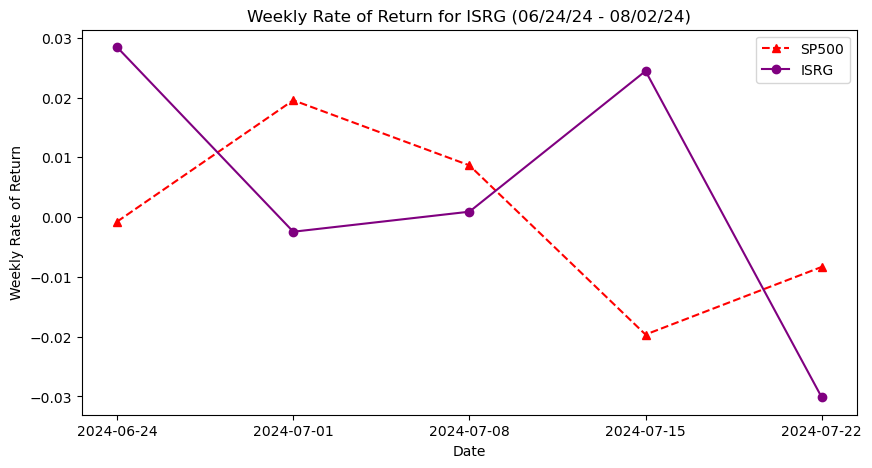

In [29]:
plt.figure(figsize=(10, 5))
dates_list = isrg_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, sp500_data['Weekly Return'], label='SP500', color = 'red', marker='^',linestyle='--')
plt.plot(dates_list, isrg_data['Weekly Return'], label='ISRG', color = 'purple', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Rate of Return')
plt.title('Weekly Rate of Return for ISRG (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

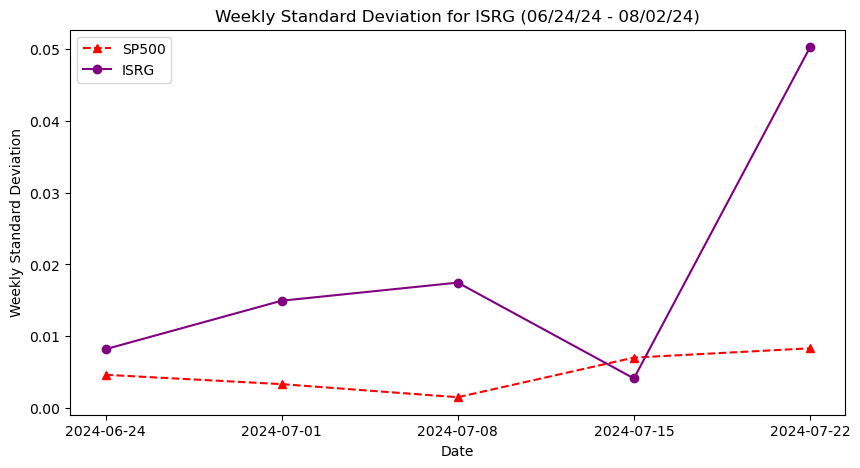

In [30]:
plt.figure(figsize=(10, 5))
dates_list = isrg_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, sp500_data['Weekly SD'], label='SP500', color = 'red', marker='^',linestyle='--')
plt.plot(dates_list, isrg_data['Weekly SD'], label='ISRG', color = 'purple', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Standard Deviation')
plt.title('Weekly Standard Deviation for ISRG (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

Observations from Data:
- Returns exceed the market’s for two weeks our of our observed period, but are below the market for the remaining weeks.
- The standard deviation is consistently higher than the market's, with only one week where it is lower.

The periods when ISRG’s returns are above the market indicate instances of stronger performance compared to the broader market. However, the fact that the returns are generally below the market for most weeks suggests underperformance over the majority of the period. The consistently higher standard deviation points to greater volatility in ISRG's returns compared to the market, indicating higher risk. The overall return of ISRG during our observed period is $r_{isrg} = -0.008$ which does not beat the overall return of the market. 

__Beta__

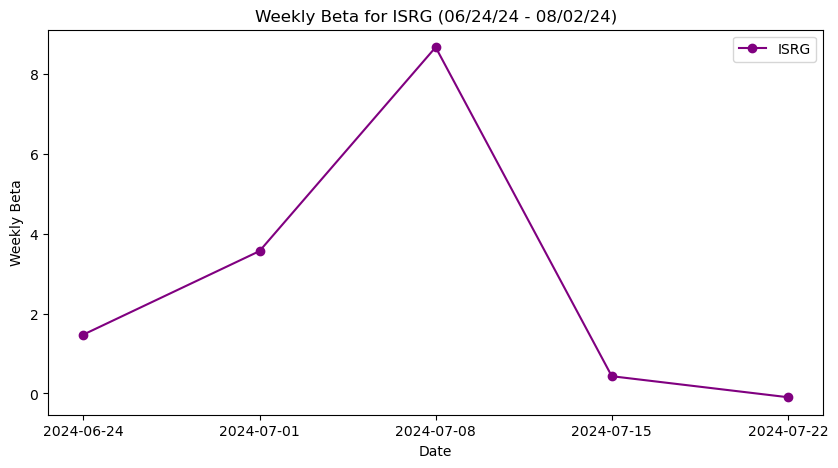

In [31]:
plt.figure(figsize=(10, 5))
dates_list = isrg_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, isrg_data['Weekly Beta'], label='ISRG', color = 'purple', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Beta')
plt.title('Weekly Beta for ISRG (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

Observations from data:
- The weekly beta is above 1 for some of the period, with only two weeks below 1.

This indicates that ISRG's stock is generally more volatile than the market when its Beta is larger than 1, which could lead to higher potential returns but also greater potential losses. The overall beta for ISRG stock is $beta_{isrg} = 0.4963$ which indicates the stock tends to move less than the market, indicating lower volatility and risk relative to market movements.

__Jensen Index__

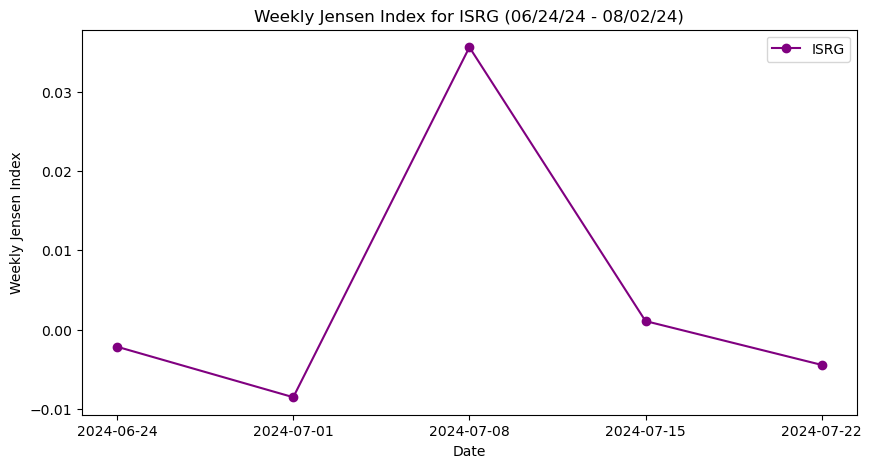

In [32]:
plt.figure(figsize=(10, 5))
dates_list = isrg_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, isrg_data['Weekly Jensen'], label='ISRG', color = 'purple', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Jensen Index')
plt.title('Weekly Jensen Index for ISRG (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

Observations from Data:
- The Jensen Index is close to or less than 0 for most of the period.
- It peaks above 0.03 only once during the observation period.

**Implications:**

The Jensen Index being close to or below 0 for most of the period suggests that the ISRG has generally underperformed relative to the expected return based on its risk. The single instance where the index exceeds 0.03 indicates a brief period of outperformance. However, the overall negative Jensen Index of $J_{insrg} = -0.00376$ implies that, on average, the portfolio or stock has delivered slightly less return than expected given its level of risk. This persistent underperformance relative to expectations indicates that the investment has not generated the anticipated excess returns over the risk-free rate when adjusted for its risk profile.

__Sharpe Ratio__

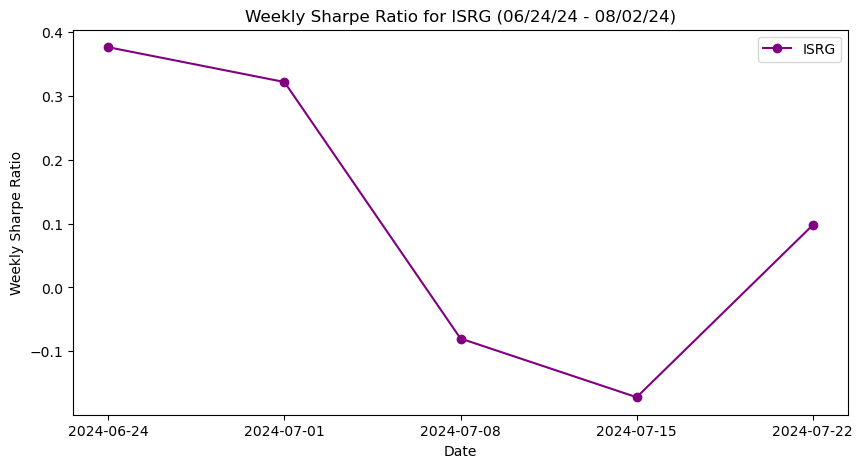

In [33]:
plt.figure(figsize=(10, 5))
dates_list = isrg_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, isrg_data['Weekly Sharpe'], label='ISRG', color = 'purple', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Sharpe Ratio')
plt.title('Weekly Sharpe Ratio for ISRG (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

Observations from Data:

- The Sharpe Ratio is above 0 for most weeks, indicating positive risk-adjusted returns, and it falls below 0 in two weeks, suggesting periods of negative risk-adjusted returns.

The Sharpe Ratio being above 0 for the majority of weeks indicates that, on average, ISRG has delivered positive returns relative to its volatility. The two weeks with a Sharpe Ratio below 0 suggest that during those periods, the returns were not sufficient to compensate for the risk taken. The overall Sharpe Ratio of $S_{isrg} = 0.105$ implies modestly positive risk-adjusted returns over the observed period. While the investment has generally provided returns that exceed the risk-free rate on a risk-adjusted basis, the relatively low overall Sharpe Ratio suggests that there is room for improvement in terms of achieving higher risk-adjusted performance.

__Value at Risk__

Intuitive Surigical stock has a value at risk of $\text{VaR}_{googl} = 16.65$ at a 5% confidence level over one month. This means there is a 5% chance that the loss will exceed 16.65 per stock in the next month. This measure helps investors understand the potential downside risk, and they should be prepared for potential losses up to $16.65, with a 5% chance of exceeding this amount.

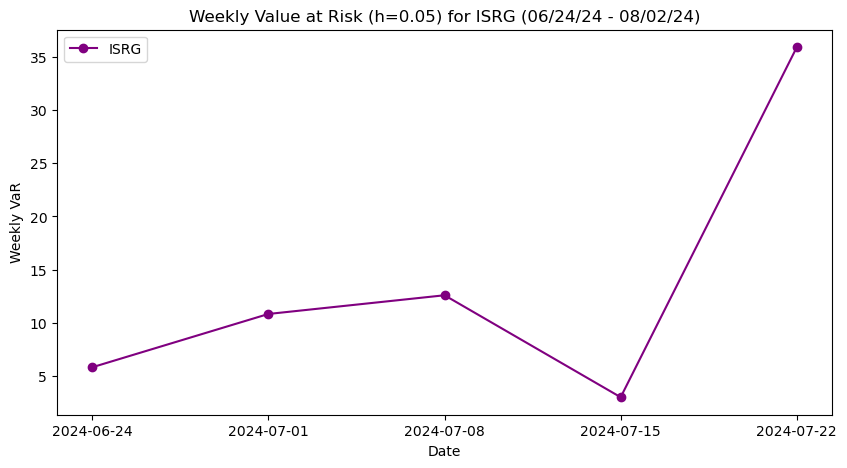

In [34]:
plt.figure(figsize=(10, 5))
dates_list = isrg_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, isrg_data['Weekly VaR'], label='ISRG', color = 'purple', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly VaR')
plt.title('Weekly Value at Risk (h=0.05) for ISRG (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

We can see a substantial increase in VaR for ISRG in the last week of our project, which means that the potential maximum loss has significantly increased. This suggests a higher level of risk or volatility in the asset or portfolio. A large increase in VaR signals to us that going forward, we need to review and potentially adjust our risk management strategies. This might include rebalancing the portfolio or implementing hedging strategies.

#### Nvidia (NVDA)
In the this part, we will collect and process data for Nvidia's stock starting from Module 4 (06/24/24) and ending in Module 10 (present day). 

In [35]:
# get weekly data and KPIs
nvda_week_data = yf.download('NVDA', start=start_date, end=end_date, interval='1wk')
nvda_week_data['Weekly Return'] = nvda_week_data['Adj Close'].pct_change()

# get daily data 
nvda_day_data = yf.download('NVDA', start=start_date, end=end_date, interval='1d')
nvda_day_data['Daily Return'] = nvda_day_data['Adj Close'].pct_change()

# calculate standard deviation, store in weekly df
weekly_std_dev = nvda_day_data['Daily Return'].resample('W').std()
dates = pd.date_range(start='2024-06-16', end='2024-07-28', freq='W')  # Weekly frequency
std_dev_series = pd.Series(weekly_std_dev, index=dates, name='Weekly SD')
std_dev_series = std_dev_series.reindex(nvda_week_data.index, method='ffill')  # Forward-fill NaNs if needed
nvda_week_data['Weekly SD'] = std_dev_series

# calculate average return, store in weekly df
weekly_avg = nvda_day_data['Daily Return'].resample('W').mean()
avg_series = pd.Series(weekly_avg, index=dates, name='Weekly Avg Return')
avg_series = avg_series.reindex(sp500_week_data.index, method='ffill')  # Forward-fill NaNs if needed
nvda_week_data['Weekly Avg Return'] = avg_series

# calculate average price, store in weekly df
weekly_price_avg = nvda_day_data['Adj Close'].resample('W').mean()
avg_price_series = pd.Series(weekly_price_avg, index=dates, name='Weekly Avg Price')
avg_price_series = avg_price_series.reindex(sp500_week_data.index, method='ffill')  # Forward-fill NaNs if needed
nvda_week_data['Weekly Avg Price'] = avg_price_series

# calculate covariance with market, store in weekly df
weekly_cov_list= []
# calculate covariance, store in weekly df
for i in range(1, len(dates)):
    week_start = dates[i-1]
    week_end = dates[i]
    
    # Filter data for the current week
    stock_week_data = nvda_day_data[(nvda_day_data.index >= week_start) & (nvda_day_data.index < week_end)]
    market_week_data = sp500_day_data[(sp500_day_data.index >= week_start) & (sp500_day_data.index < week_end)]
    
    # Calculate weekly covariance
    if len(stock_week_data) > 0 and len(market_week_data) > 0:
        covariance = stock_week_data['Daily Return'].cov(market_week_data['Daily Return'])
    else:
        covariance = None
    
    # Append the result to the list
    weekly_cov_list.append(covariance)

cov_series = pd.Series(weekly_cov_list, index=dates[1:], name='Weekly Cov')
cov_series = cov_series.reindex(nvda_week_data.index, method='ffill')  # Forward-fill NaNs if needed
nvda_week_data['Weekly Cov'] = cov_series

# calculate Weekly Beta 
nvda_week_data['Weekly Beta'] = nvda_week_data['Weekly Cov']/(sp500_week_data['Weekly SD']**2)

# calculate Weekly Jensen Index
nvda_week_data['Weekly Jensen'] = nvda_week_data['Weekly Beta']*((sp500_week_data['Weekly Avg Return']) - 0.000898) - (nvda_week_data['Weekly Avg Return'] - 0.000898)

# calculate Sharpe Ratio 
nvda_week_data['Weekly Sharpe'] = (nvda_week_data['Weekly Avg Return'] - 0.000898)/nvda_week_data['Weekly SD']

# calculate VaR
nvda_week_data['Weekly VaR'] = -1 * nvda_week_data['Weekly SD'] * quantile_value * nvda_week_data['Weekly Avg Price']

nvda_data = nvda_week_data[['Adj Close','Weekly Return', 'Weekly Avg Price', 'Weekly Avg Return', 'Weekly SD', 
                            'Weekly Beta', 'Weekly Jensen', 'Weekly Sharpe', 'Weekly VaR']].tail(5)

# calculate total return 
start_price = nvda_data['Adj Close'].iloc[0]
end_price = nvda_data['Adj Close'].iloc[-1]
total_return_nvda = (end_price - start_price)/start_price

# calculate total sd
std_nvda = nvda_day_data['Daily Return'].std()

# Calculate overall beta 
cov_daily_sp500_nvda = nvda_day_data['Daily Return'].cov(sp500_day_data['Daily Return'])
# print("cov_daily_sp500_nvda",cov_daily_sp500_nvda)
beta_nvda = cov_daily_sp500_nvda/sp500_daily_var

# Calculate overall Jensen
jensen_nvda = beta_nvda*(sp500_week_data['Weekly Return'].mean() - 0.0038986) - (nvda_week_data['Weekly Return'].mean()- 0.0038986)

# Calculate overall Sharpe 
sharpe_nvda = (nvda_week_data['Weekly Return'].mean() - 0.0038986)/nvda_week_data['Weekly Return'].std()

# Calculate overall VaR
var_nvda = -1 * std_nvda*quantile_value * nvda_data['Adj Close'].mean()

overall_kpis.loc[len(overall_kpis)] = ['NVDA', round(total_return_nvda, 4), round(std_nvda, 4), round(beta_nvda, 4), round(jensen_nvda, 4), round(sharpe_nvda, 4), round(var_nvda, 4)]
display(overall_kpis.tail(1))

display(nvda_data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,stock,return,standard deviation,beta,jensen index,sharpe ratio,VaR (h=.05)
5,NVDA,-0.0848,0.0348,2.9257,0.0197,-0.67,6.9699


,Adj Close,Weekly Return,Weekly Avg Price,Weekly Avg Return,Weekly SD,Weekly Beta,Weekly Jensen,Weekly Sharpe,Weekly VaR
Date,,,,,,,,,
2024-06-24,123.540001,-0.023939,130.977499,-0.009825,0.032576,3.649758,0.013009,-0.329166,7.018111
2024-07-01,125.830002,0.018537,123.625999,-0.003903,0.048320,10.488281,-0.006161,-0.099353,9.825637
2024-07-08,129.240005,0.027100,125.270000,0.004918,0.029265,-4.567735,-0.022076,0.137367,6.030034
2024-07-15,117.930000,-0.087512,130.226003,0.005857,0.034741,4.187014,-0.001417,0.142738,7.441679
2024-07-22,113.059998,-0.041296,122.362000,-0.017689,0.033522,1.566258,0.011020,-0.554477,6.746946


__Weekly Rate of Return & Standard Deviation__

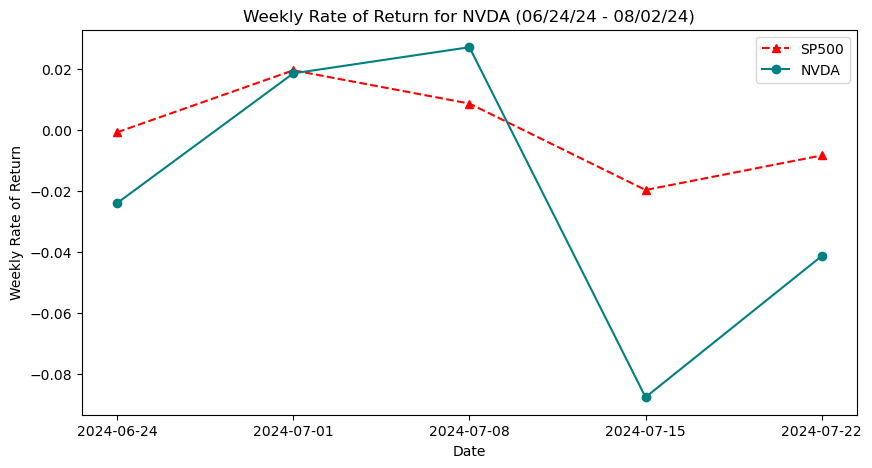

In [36]:
plt.figure(figsize=(10, 5))
dates_list = nvda_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, sp500_data['Weekly Return'], label='SP500', color = 'red', marker='^',linestyle='--')
plt.plot(dates_list, nvda_data['Weekly Return'], label='NVDA', color = 'teal', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Rate of Return')
plt.title('Weekly Rate of Return for NVDA (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

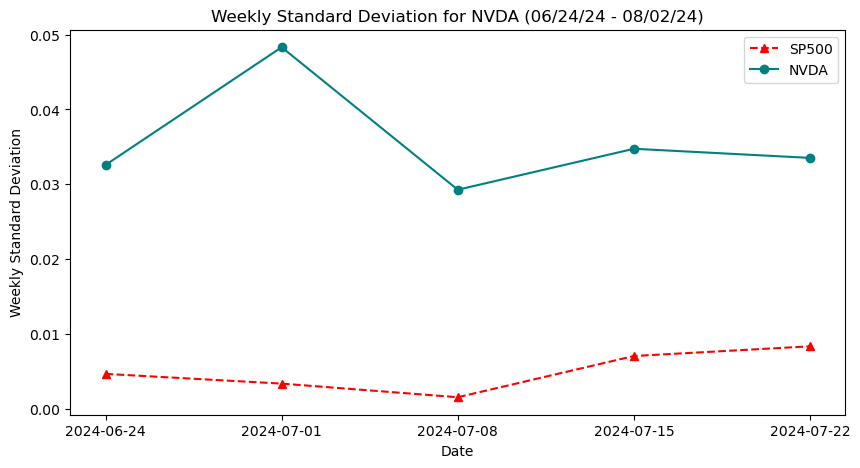

In [37]:
plt.figure(figsize=(10, 5))
dates_list = nvda_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, sp500_data['Weekly SD'], label='SP500', color = 'red', marker='^',linestyle='--')
plt.plot(dates_list, nvda_data['Weekly SD'], label='NVDA', color = 'teal', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Standard Deviation')
plt.title('Weekly Standard Deviation for NVDA (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

Observations from Data:

- NVDA stock weekly returns range from -0.08 to 0.02. For most weeks, the returns are below -0.02.
- The standard deviation of NVDA's returns consistently exceeds that of the market.
- The overall return for NVDA is -0.1426.

The wide range of weekly returns for NVDA stock highlights significant volatility in NVDA's performance. The fact that most weekly returns are below -0.02 suggests frequent periods of underperformance. The consistently higher standard deviation compared to the market indicates that NVDA's returns are more volatile, reflecting greater risk. The overall return of $r_{nvda} = -0.08$ indicates a substantial negative performance over the observed period. This combination of high volatility and negative overall returns suggests that NVDA has underperformed the market and experienced higher risk, which may be a concern for investors looking for stable and positive returns.

__Beta__

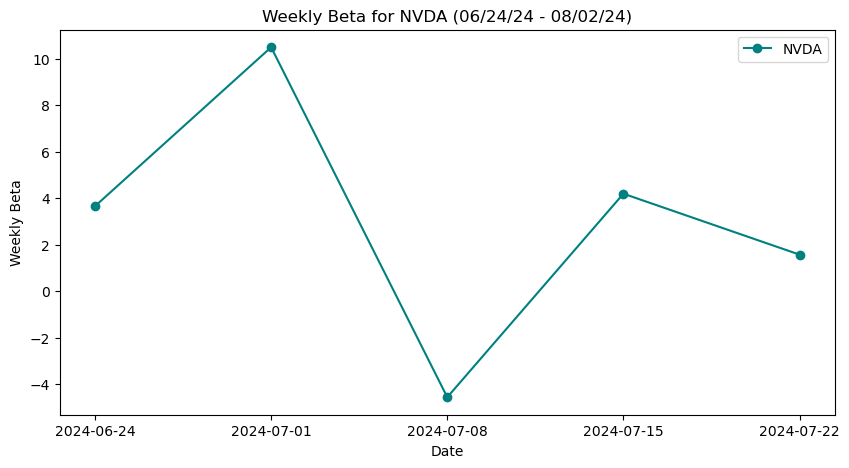

In [38]:
plt.figure(figsize=(10, 5))
dates_list = nvda_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, nvda_data['Weekly Beta'], label='NVDA', color = 'teal', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Beta')
plt.title('Weekly Beta for NVDA (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

Observations from Data:

- NVDA’s beta is consistently above 1, indicating higher volatility relative to the market.
- There is one week where the beta is unusually low at -4.
- The overall beta is 2.9257.

The consistently high beta, above 1, suggests that NVDA is significantly more volatile than the market, amplifying both upward and downward market movements. The overall beta of $\beta_{nvda} = 2.9257$ indicates that NVDA is nearly three times more volatile than the market on average. Investors should be aware that while NVDA may offer higher potential returns, it also comes with increased risk and volatility.

__Jensen Index__

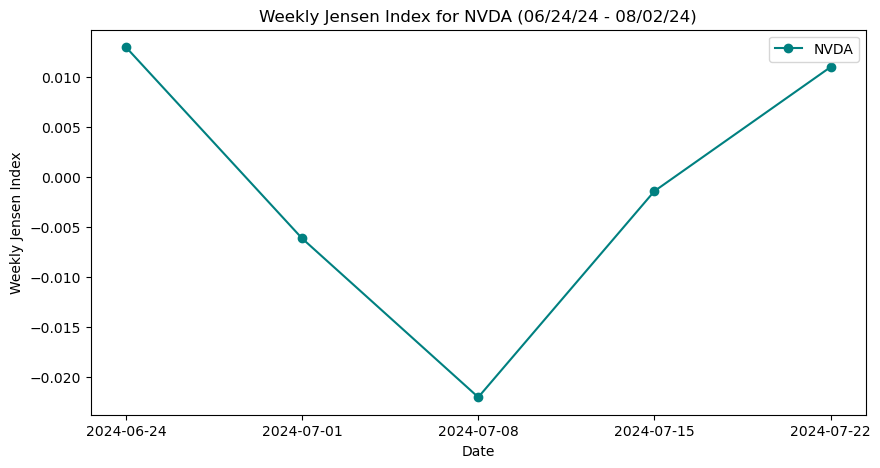

In [39]:
plt.figure(figsize=(10, 5))
dates_list = nvda_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, nvda_data['Weekly Jensen'], label='NVDA', color = 'teal', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Jensen Index')
plt.title('Weekly Jensen Index for NVDA (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

Observations from Data:

- The Jensen Index for NVDA generally ranges between 0.01 and -0.02, and it is below zero for the majority of the observed period.
- The overall Jensen Index is 0.0197.

**Implications:**

The majority of the Jensen Index values being below zero suggests that, for most of the period, the portfolio or stock has underperformed relative to the expected returns based on its risk level. However, the overall positive Jensen Index of $J_{nvda} = 0.0197$ indicates that, on average, the portfolio or stock has slightly outperformed the expected return given its risk. So despite frequent underperformance, there were enough periods of strong performance to produce a marginally positive average excess return.

__Sharpe Ratio__

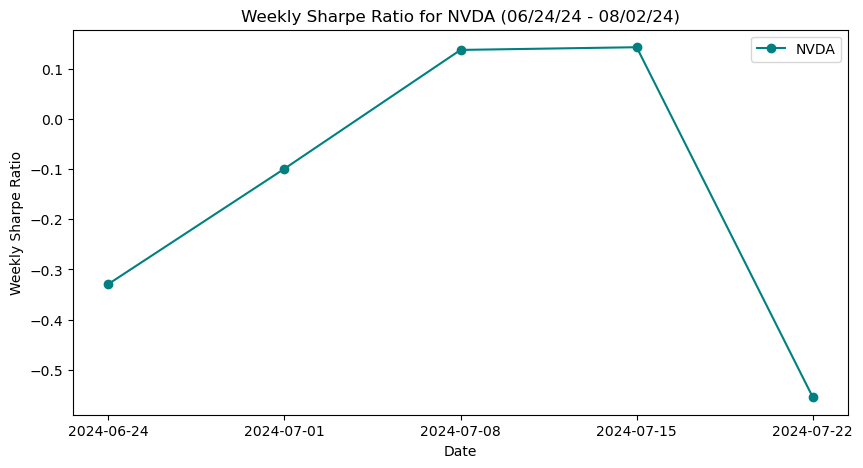

In [40]:
plt.figure(figsize=(10, 5))
dates_list = nvda_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, nvda_data['Weekly Sharpe'], label='NVDA', color = 'teal', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Sharpe Ratio')
plt.title('Weekly Sharpe Ratio for NVDA (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

Observations from Data:

- The Sharpe Ratio for Nvidia stock ranges from 0.01 to -0.06.
- The Sharpe Ratio for NVDA is below 0 for most of the observed period, with only two weeks showing a ratio around 0.01.

The predominantly negative Sharpe Ratio for NVDA suggests that, over most of the period, the returns were insufficient to compensate for the risk taken. This indicates that NVDA's risk-adjusted performance has been poor overall. The brief periods with a Sharpe Ratio around 0.01 are not substantial enough to offset the generally negative performance. The overall Sharpe Ratio of $S_{nvda} = -0.670014$ underscores that NVDA has provided negative risk-adjusted returns and highlights potential concerns for investors regarding its risk-return profile.

__Value at Risk__

Nvidia stock has a value at risk of $\text{VaR}_{googl} = 6.97$ at a 5% confidence level over the course of our project. This means there is a 5% chance that the loss will exceed 6.97 per stock in the next month. This measure helps investors understand the potential downside risk, and they should be prepared for potential losses up to $6.97, with a 5% chance of exceeding this amount.

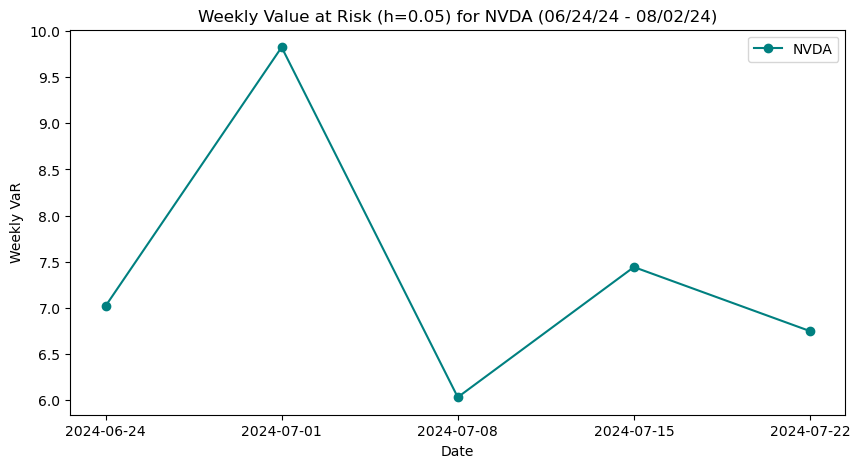

In [41]:
plt.figure(figsize=(10, 5))
dates_list = nvda_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, nvda_data['Weekly VaR'], label='NVDA', color = 'teal', marker='o',linestyle='-')

# Set x-axis labels to the dates list
plt.xticks(dates_list)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly VaR')
plt.title('Weekly Value at Risk (h=0.05) for NVDA (06/24/24 - 08/02/24)')
plt.legend()

# Display the plot
plt.show()

The Value at Risk (VaR) for NVIDIA peaked at 10 during the second week. For the remaining weeks, VaR remained at or below 7. The spike in VaR to $10 during the second week indicates a significant increase in potential risk for that period. This could be attributed to factors such as market volatility, company-specific events, or broader economic conditions affecting NVIDIA. The decrease in VaR to levels at or below 7 in the following weeks suggests that the heightened risk was temporary and that risk levels have stabilized. However, ongoing monitoring is necessary to ensure that the conditions leading to the peak are understood and managed.

#### Individual Stock Analysis Summary
In this section, we will summarize our findings from the project by reviewing the overall key performance indicators (KPIs) measured throughout the duration of our analysis. This summary will provide a comprehensive overview of the project’s outcomes and insights. Below is a table of the market and our stocks' KPIs over the course of our project. 

In [42]:
styled_df = overall_kpis.style \
    .background_gradient(subset=['return'], cmap='RdYlGn', low=-0.1, high=0.1) \
    .background_gradient(subset=['standard deviation'], cmap='Reds') \
    .background_gradient(subset=['beta'], cmap='Reds') \
    .background_gradient(subset=['jensen index'], cmap='RdYlGn') \
    .background_gradient(subset=['sharpe ratio'], cmap='RdYlGn') \
    .background_gradient(subset=['VaR (h=.05)'], cmap='Reds')

# Display the styled DataFrame
styled_df

,stock,return,standard deviation,beta,jensen index,sharpe ratio,VaR (h=.05)
0,SP500,-0.000253,0.007538,nan,nan,nan,nan
1,AVGO,-0.052600,0.031400,2.707500,0.016600,-0.515400,8.361200
2,FBGRX,-0.046200,0.012900,1.585100,0.006700,-0.452400,4.648900
3,GOOGL,-0.083200,0.017400,1.622500,0.007600,-0.306900,5.159800
4,ISRG,-0.008000,0.022700,0.496300,-0.003800,0.105400,16.651300
5,NVDA,-0.084800,0.034800,2.925700,0.019700,-0.670000,6.969900


__Stock Overview__:
- __SP500__ serves as the market benchmark with negligible negative returns and moderate volatility.
- __AVGO__ shows a significant negative return with high volatility and risk (Beta above 2). The positive Jensen Index indicates some excess return relative to the risk-free rate, despite the negative Sharpe Ratio.
- __FBGRX__ has a notable negative return with moderate volatility. The positive Jensen Index suggests slight outperformance relative to the risk-free rate, though the Sharpe Ratio is negative.
- __GOOGL__ experiences the most significant negative return among the stocks, with moderate volatility. Despite the negative return, the positive Jensen Index indicates a modest excess return relative to the risk-free rate.
- __ISRG__ shows a slight negative return but has a lower Beta, indicating less volatility compared to the market. The negative Jensen Index and positive Sharpe Ratio reflect a mixed performance relative to the risk-free rate.
- __NVDA__ has the highest negative return and volatility among the stocks, with a very high Beta indicating significant risk. The positive Jensen Index suggests some excess return relative to the risk-free rate, despite the negative Sharpe Ratio.

__Key Takeaways__:
- All stocks in the portfolio have negative returns over the observed period, with GOOGL and NVDA showing the highest negative returns.
- Volatility, as measured by standard deviation, is highest for NVDA and AVGO.
- Beta values suggest that AVGO and NVDA are highly volatile compared to the market, while ISRG has a Beta less than 1, indicating lower volatility.
- The Jensen Index is positive for AVGO, FBGRX, GOOGL, and NVDA, suggesting these stocks have some excess returns relative to the risk-free rate despite their negative overall returns.
- The Sharpe Ratio is negative for most stocks, indicating that the returns do not adequately compensate for the risk taken, except for ISRG, which has a slightly positive Sharpe Ratio.

__Implications for Investors__:

Based on the analysis of the portfolio’s performance, several key implications for investors can be drawn:

1. **Negative Returns Across the Board**
    - All the stocks in the portfolio have experienced negative returns over the observed period, with GOOGL and NVDA showing the most significant losses. This indicates that the portfolio, as it stands, has not performed well in terms of generating positive returns. Investors should reassess their stock selections or consider diversifying to mitigate such extensive losses.

2. **High Volatility in Certain Stocks**
    - Stocks like AVGO and NVDA exhibit high volatility, as evidenced by their high standard deviations. This implies a higher risk associated with these investments, which can result in larger fluctuations in portfolio value. Investors with low risk tolerance may want to consider reducing exposure to these high-volatility stocks.

3. **Risk Indicators (Beta)**
    - AVGO and NVDA have Beta values significantly above 1, indicating that they are more volatile than the market. In contrast, ISRG has a Beta below 1, suggesting lower volatility. Investors should weigh the trade-off between potential returns and the higher risk associated with stocks having Beta values above 1.

4. **Excess Return vs. Risk-Free Rate (Jensen Index)**
    - The positive Jensen Index values for AVGO, FBGRX, GOOGL, and NVDA suggest that these stocks have some excess returns relative to the risk-free rate. This indicates that, despite negative overall returns, these stocks have outperformed the risk-free rate to some extent, possibly justifying their inclusion in a diversified portfolio.

5. **Risk-Adjusted Performance (Sharpe Ratio)**
    - Most stocks in the portfolio have negative Sharpe Ratios, indicating that the returns do not sufficiently compensate for the risk taken. The exception is ISRG, which has a slightly positive Sharpe Ratio, suggesting that it has provided a better risk-adjusted return compared to others in the portfolio. Investors seeking better risk-adjusted returns might consider increasing their allocation to stocks like ISRG.

6. **Rebalancing and Diversification**
    - Given the current performance, investors should consider rebalancing their portfolio to reduce exposure to underperforming and high-risk stocks. Diversifying into other asset classes or sectors may also help in achieving more stable and positive returns.

7. **Long-term Considerations**
    - The observed data reflects short-term performance. Investors should also consider the long-term growth potential and fundamentals of the companies within the portfolio. High volatility and negative short-term performance do not necessarily preclude long-term profitability.

Investors should use this analysis to make informed decisions about portfolio adjustments, risk management, and diversification strategies. Continuous monitoring and reassessment of stock performance and market conditions are essential to optimize portfolio returns and mitigate risks.

### Portfolio Analysis
In this section, we will analyze our entire portfolio. In the code block below, we will calculate the portfolio's weekly returns, standard deviation, and other key performance indicators (KPIs). As a reminder, the weights selected in Module 4 for our portfolio stocks are as follows:
- $\sigma_{avgo}=0.23$
- $\sigma_{fbgrx}=0.15$
- $\sigma_{googl}=0.17$
- $\sigma_{isrg}=0.14$
- $\sigma_{nvda}=0.31$

In [43]:
stocks = [avgo_data, fbgrx_data, googl_data, isrg_data, nvda_data] 
stocks_daily = [avgo_day_data, fbgrx_day_data, googl_day_data, isrg_day_data, nvda_day_data] 

# Create a new dataframe to store portfolio weekly returns
portfolio_data = pd.DataFrame()
portfolio_day_data = pd.DataFrame()

# Compute the weighted weekly returns
portfolio_data['Weekly Return'] = sum(df['Weekly Return'] * weight for df, weight in zip(stocks, optimal_weights))
dates_list = portfolio_data.index.to_list()

# Compute weighted daily returns of portfolio 
portfolio_day_data['Daily Return'] = sum(df['Daily Return'] * weight for df, weight in zip(stocks_daily, optimal_weights))

# Compute daily worth of portfolio 
portfolio_day_data['Adj Close'] = sum(df['Adj Close'] * weight for df, weight in zip(stocks_daily, optimal_weights))

# calculate average price, store in weekly df
weekly_price_avg = portfolio_day_data['Adj Close'].resample('W').mean()
avg_price_series = pd.Series(weekly_price_avg, index=dates, name='Weekly Avg Price')
avg_price_series = avg_price_series.reindex(sp500_week_data.index, method='ffill')  # Forward-fill NaNs if needed
portfolio_data['Weekly Avg Price'] = avg_price_series

# calculate standard deviation, store in weekly df
weekly_std_dev = portfolio_day_data['Daily Return'].resample('W').std()
dates = pd.date_range(start='2024-06-16', end='2024-07-28', freq='W')  # Weekly frequency
std_dev_series = pd.Series(weekly_std_dev, index=dates, name='Weekly SD')
std_dev_series = std_dev_series.reindex(isrg_week_data.index, method='ffill')  # Forward-fill NaNs if needed
portfolio_data['Weekly SD'] = std_dev_series

# calculate average return, store in weekly df
weekly_avg = portfolio_day_data['Daily Return'].resample('W').mean()
avg_series = pd.Series(weekly_avg, index=dates, name='Weekly Avg Return')
avg_series = avg_series.reindex(sp500_week_data.index, method='ffill')  # Forward-fill NaNs if needed
portfolio_data['Weekly Avg Return'] = avg_series

# calculate covariance with market, store in weekly df
weekly_cov_list = []
# calculate covariance, store in weekly df
for i in range(1, len(dates)):
    week_start = dates[i-1]
    week_end = dates[i]
    
    # Filter data for the current week
    stock_week_data = portfolio_day_data[(portfolio_day_data.index >= week_start) & (portfolio_day_data.index < week_end)]
    market_week_data = sp500_day_data[(sp500_day_data.index >= week_start) & (sp500_day_data.index < week_end)]
    
    # Calculate weekly covariance
    if len(stock_week_data) > 0 and len(market_week_data) > 0:
        covariance = stock_week_data['Daily Return'].cov(market_week_data['Daily Return'])
    else:
        covariance = None
    
    # Append the result to the list
    weekly_cov_list.append(covariance)

cov_series = pd.Series(weekly_cov_list, index=dates[1:], name='Weekly Cov')
cov_series = cov_series.reindex(nvda_week_data.index, method='ffill')  # Forward-fill NaNs if needed
portfolio_data['Weekly Cov'] = cov_series

# calculate Weekly Beta 
portfolio_data['Weekly Beta'] = portfolio_data['Weekly Cov']/(sp500_week_data['Weekly SD']**2)

# calculate Weekly Jensen Index
portfolio_data['Weekly Jensen'] = portfolio_data['Weekly Beta']*((sp500_week_data['Weekly Avg Return']) - 0.000898) - (portfolio_data['Weekly Avg Return'] - 0.000898)

# calculate Sharpe Ratio 
portfolio_data['Weekly Sharpe'] = (portfolio_data['Weekly Avg Return'] - 0.000898)/portfolio_data['Weekly SD']

# calculate portfolio price
portfolio_data['Portfolio Worth'] = [990000, 1019700, 1019700, 968715, 929966.4]

# calculate VaR
portfolio_data['Weekly VaR'] = -1 * portfolio_data['Weekly SD'] * quantile_value * portfolio_data['Portfolio Worth']

# calculate total return 
start_price = portfolio_data['Weekly Avg Price'].iloc[0]
end_price = portfolio_data['Weekly Avg Price'].iloc[-1]
total_return_portfolio = (end_price - start_price)/start_price

# calculate total sd
std_portfolio = portfolio_data['Weekly Return'].std()

# Calculate overall beta 
cov_daily_sp500_portfolio = portfolio_day_data['Daily Return'].cov(sp500_day_data['Daily Return'])
# print("cov_daily_sp500_nvda",cov_daily_sp500_nvda)
beta_portfolio = cov_daily_sp500_portfolio/sp500_daily_var

# Calculate overall Jensen
jensen_portfolio = beta_portfolio*(sp500_week_data['Weekly Return'].mean() - 0.0038986) - (portfolio_data['Weekly Return'].mean()- 0.0038986)

# Calculate overall Sharpe 
sharpe_portfolio = (portfolio_data['Weekly Return'].mean() - 0.0038986)/portfolio_data['Weekly Avg Price'].std()

# Calculate overall VaR
# WRONG
var_portfolio = -1 * std_portfolio*quantile_value * portfolio_data['Portfolio Worth'].mean()

overall_kpis.loc[len(overall_kpis)] = ['Portfolio', round(total_return_portfolio, 4), round(std_portfolio, 4), round(beta_portfolio, 4), round(jensen_portfolio, 4), round(sharpe_portfolio, 4), round(var_portfolio, 4)]
display(overall_kpis.tail(1))

# Set display options
pd.set_option('display.float_format', '{:.2f}'.format)  # Display floats with 2 decimal places
display(portfolio_data[['Weekly Return','Portfolio Worth', 'Weekly SD', 'Weekly Beta', 'Weekly Jensen', 'Weekly Sharpe', 'Weekly VaR']])

,stock,return,standard deviation,beta,jensen index,sharpe ratio,VaR (h=.05)
6,Portfolio,-0.0215,0.0345,2.1101,0.011,-0.0053,55885.0616


,Weekly Return,Portfolio Worth,Weekly SD,Weekly Beta,Weekly Jensen,Weekly Sharpe,Weekly VaR
Date,,,,,,,
2024-06-24,-0.01,990000.00,0.02,3.45,0.01,-0.31,27647.95
2024-07-01,0.03,1019700.00,0.02,5.19,-0.00,-0.09,37829.62
2024-07-08,0.00,1019700.00,0.01,-0.73,-0.01,0.62,18923.04
2024-07-15,-0.05,968715.00,0.02,2.26,0.00,-0.01,28883.46
2024-07-22,-0.04,929966.40,0.02,1.34,0.01,-0.51,34833.24


Below is our portfolio's KPIs compared to the individual stocks. Below we perform a more thorough analysis of each KPI

In [44]:
styled_df = overall_kpis.style \
    .background_gradient(subset=['return'], cmap='RdYlGn', low=-0.1, high=0.1) \
    .background_gradient(subset=['standard deviation'], cmap='Reds') \
    .background_gradient(subset=['beta'], cmap='Reds') \
    .background_gradient(subset=['jensen index'], cmap='RdYlGn') \
    .background_gradient(subset=['sharpe ratio'], cmap='RdYlGn')

# Display the styled DataFrame
styled_df

,stock,return,standard deviation,beta,jensen index,sharpe ratio,VaR (h=.05)
0,SP500,-0.000253,0.007538,nan,nan,nan,nan
1,AVGO,-0.052600,0.031400,2.707500,0.016600,-0.515400,8.361200
2,FBGRX,-0.046200,0.012900,1.585100,0.006700,-0.452400,4.648900
3,GOOGL,-0.083200,0.017400,1.622500,0.007600,-0.306900,5.159800
4,ISRG,-0.008000,0.022700,0.496300,-0.003800,0.105400,16.651300
5,NVDA,-0.084800,0.034800,2.925700,0.019700,-0.670000,6.969900
6,Portfolio,-0.021500,0.034500,2.110100,0.011000,-0.005300,55885.061600


#### Weekly Rate of Return and Standard Deviation
In the next section, we will analyze the weekly rate of return for our entire portfolio. We will compare our portfolio's weekly rate of return to the market's rate of return, using it as a benchmark. Additionally, we will examine the standard deviation to assess the volatility of our portfolio.

We will display the component stocks that make up the portfolio in the background. This helps to provide context for our portfolio's performance, allowing for a better understanding of how individual stocks contribute to the overall returns and risk. The two stocks that make up the majority of our portfolio, AVGO and NVDA, will have a higher saturation than the other three, indicating that these stocks have a more significant impact on the overall performance and risk of the portfolio

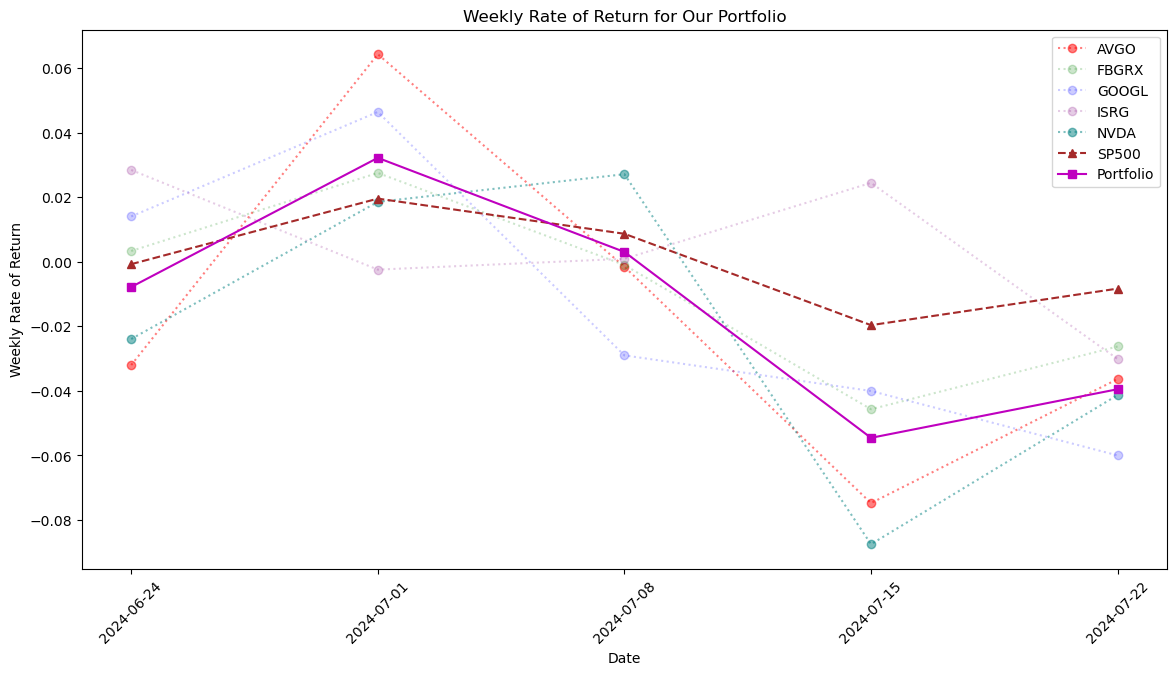

In [45]:
plt.figure(figsize=(14, 7))

dates_list = avgo_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, avgo_data['Weekly Return'], label='AVGO', marker='o', linestyle=':', alpha=0.50, color='red')
plt.plot(dates_list, fbgrx_data['Weekly Return'], label='FBGRX', marker= 'o', linestyle=':', alpha=0.20, color='green')
plt.plot(dates_list, googl_data['Weekly Return'], label='GOOGL', marker= 'o', linestyle=':', alpha=0.20, color='blue')
plt.plot(dates_list, isrg_data['Weekly Return'], label='ISRG', marker= 'o', linestyle=':', alpha=0.20, color='purple')
plt.plot(dates_list, nvda_data['Weekly Return'], label='NVDA', marker= 'o', linestyle=':', alpha=0.50, color='teal')
plt.plot(dates_list, sp500_data['Weekly Return'], label='SP500', marker='^', linestyle='--', color='brown')
plt.plot(dates_list, portfolio_data['Weekly Return'], label='Portfolio', marker='s', linestyle='-', color='m')

# Set x-axis labels to the dates list
plt.xticks(dates_list, rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Rate of Return')
plt.title('Weekly Rate of Return for Our Portfolio')
plt.legend()

# Display the plot
plt.show()

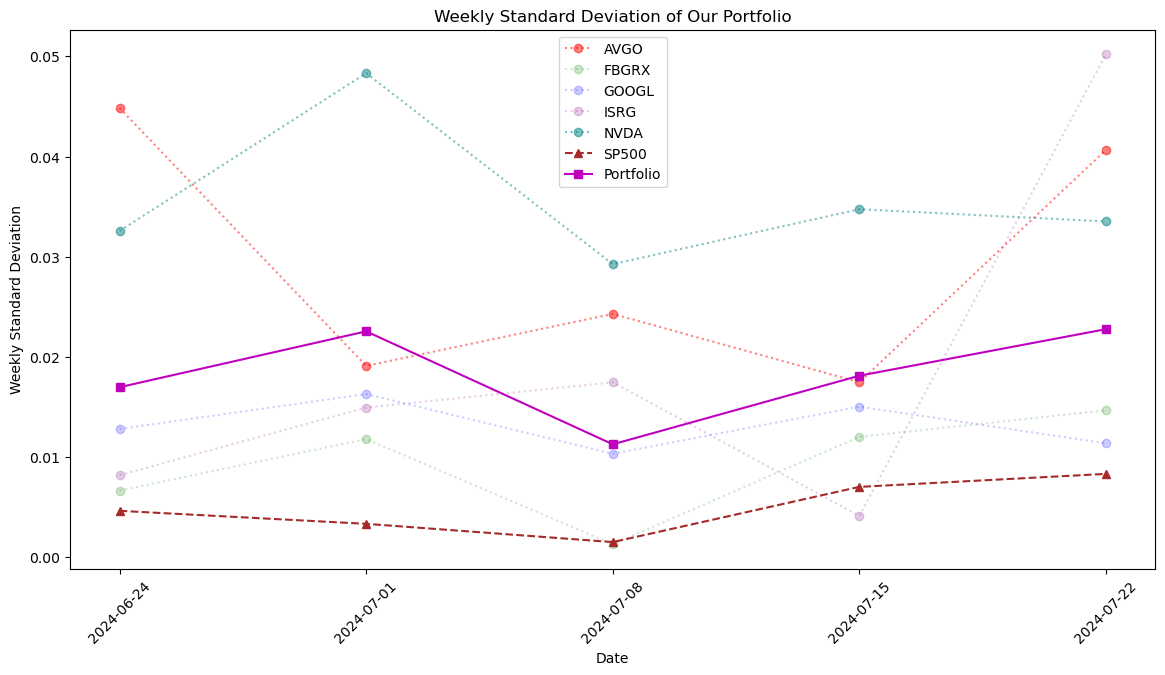

In [46]:
plt.figure(figsize=(14, 7))

dates_list = avgo_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, avgo_data['Weekly SD'], label='AVGO', marker='o', linestyle=':', alpha=0.50, color='red')
plt.plot(dates_list, fbgrx_data['Weekly SD'], label='FBGRX', marker= 'o', linestyle=':', alpha=0.20, color='green')
plt.plot(dates_list, googl_data['Weekly SD'], label='GOOGL', marker= 'o', linestyle=':', alpha=0.20, color='blue')
plt.plot(dates_list, isrg_data['Weekly SD'], label='ISRG', marker= 'o', linestyle=':', alpha=0.20, color='purple')
plt.plot(dates_list, nvda_data['Weekly SD'], label='NVDA', marker= 'o', linestyle=':', alpha=0.50, color='teal')
plt.plot(dates_list, sp500_data['Weekly SD'], label='SP500', marker='^', linestyle='--', color='brown')
plt.plot(dates_list, portfolio_data['Weekly SD'], label='Portfolio', marker='s', linestyle='-', color='m')

# Set x-axis labels to the dates list
plt.xticks(dates_list, rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Standard Deviation')
plt.title('Weekly Standard Deviation of Our Portfolio')
plt.legend()

# Display the plot
plt.show()

Conclusions from Data and Visualizations:
- **Return Range**: Our portfolio's returns range from 0.02 to -0.06, showing a broad spectrum of performance.
- **Underperforms Compared to Market**: The portfolio consistently underperforms the market, with only one week where returns exceed the market’s.
- **Volatility**: Our portfolio exhibits consistently higher volatility compared to the market, indicating greater risk and fluctuation in returns.
- **Component Stocks**: The component stocks with the highest weighting (AVGO and NVDA) significantly influence the portfolio’s performance and may account for the low returns and high volatility.

The portfolio has an overall return of $r_{portfolio} = -0.0215$, indicating a loss over the observed period. This negative return is reflective of the poor performance of most individual stocks within the portfolio. The standard deviation of the portfolio is $\sigma_{portfolio} = 0.0345$, which is relatively high. This suggests that the portfolio is subject to significant fluctuations in value, driven by the high volatility of individual stocks like NVDA and AVGO. 

#### Beta

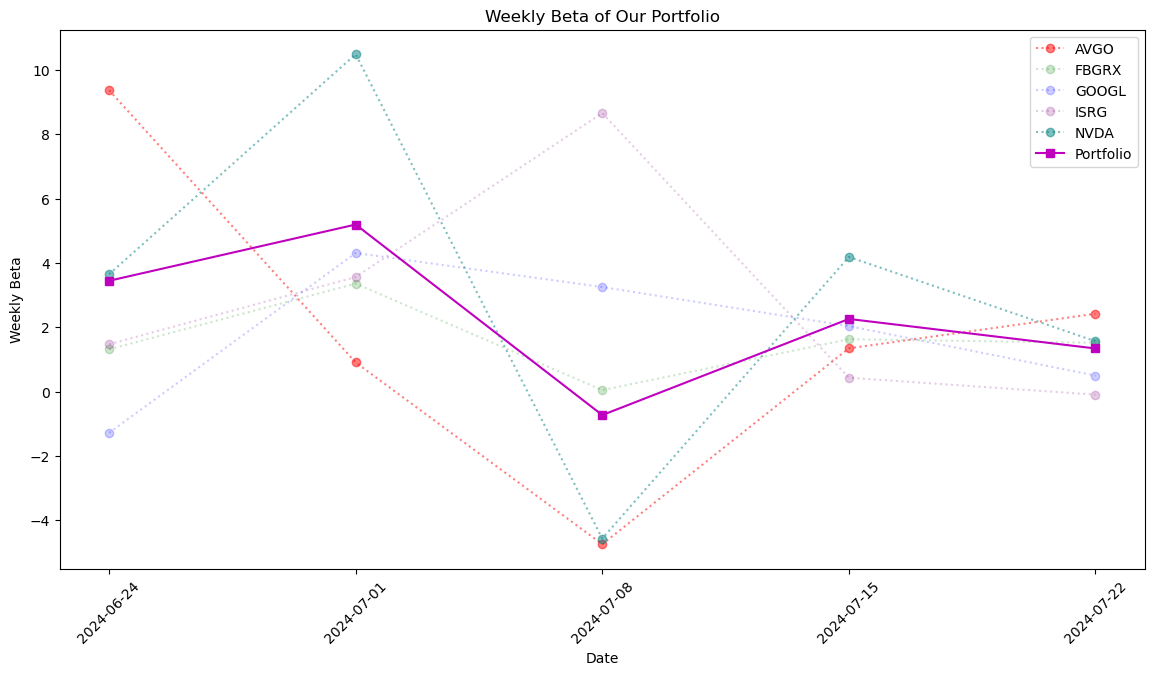

In [47]:
plt.figure(figsize=(14, 7))

dates_list = avgo_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, avgo_data['Weekly Beta'], label='AVGO', marker='o', linestyle=':', alpha=0.50, color='red')
plt.plot(dates_list, fbgrx_data['Weekly Beta'], label='FBGRX', marker= 'o', linestyle=':', alpha=0.20, color='green')
plt.plot(dates_list, googl_data['Weekly Beta'], label='GOOGL', marker= 'o', linestyle=':', alpha=0.20, color='blue')
plt.plot(dates_list, isrg_data['Weekly Beta'], label='ISRG', marker= 'o', linestyle=':', alpha=0.20, color='purple')
plt.plot(dates_list, nvda_data['Weekly Beta'], label='NVDA', marker= 'o', linestyle=':', alpha=0.50, color='teal')
plt.plot(dates_list, portfolio_data['Weekly Beta'], label='Portfolio', marker='s', linestyle='-', color='m')

# Set x-axis labels to the dates list
plt.xticks(dates_list, rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Beta')
plt.title('Weekly Beta of Our Portfolio')
plt.legend()

# Display the plot
plt.show()

The portfolio’s Beta of $\beta_{portfolio}=2.11$ indicates that it is more than twice as volatile as the market. This high Beta suggests that the portfolio is highly sensitive to market movements, potentially leading to larger gains in bullish markets and larger losses in bearish markets. The high value is largely influenced by stocks like NVDA and AVGO, which have individual Betas of 2.9257 and 2.7075, respectively. These stocks contribute to the portfolio’s overall risk profile due to their high sensitivity to market movements. Investors should be aware of the high volatility associated with a high Beta. This level of risk may not be suitable for all investors, particularly those with lower risk tolerance or shorter investment horizons.

#### Jensen Index

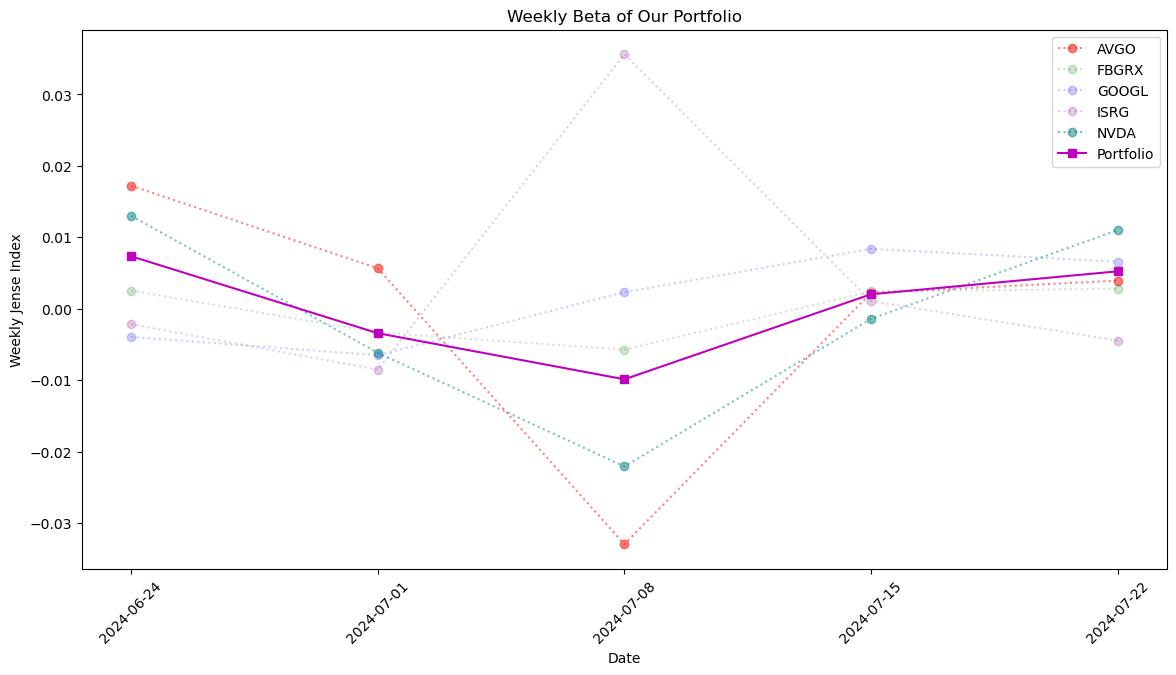

In [48]:
plt.figure(figsize=(14, 7))

dates_list = avgo_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, avgo_data['Weekly Jensen'], label='AVGO', marker='o', linestyle=':', alpha=0.50, color='red')
plt.plot(dates_list, fbgrx_data['Weekly Jensen'], label='FBGRX', marker= 'o', linestyle=':', alpha=0.20, color='green')
plt.plot(dates_list, googl_data['Weekly Jensen'], label='GOOGL', marker= 'o', linestyle=':', alpha=0.20, color='blue')
plt.plot(dates_list, isrg_data['Weekly Jensen'], label='ISRG', marker= 'o', linestyle=':', alpha=0.20, color='purple')
plt.plot(dates_list, nvda_data['Weekly Jensen'], label='NVDA', marker= 'o', linestyle=':', alpha=0.50, color='teal')
plt.plot(dates_list, portfolio_data['Weekly Jensen'], label='Portfolio', marker='s', linestyle='-', color='m')

# Set x-axis labels to the dates list
plt.xticks(dates_list, rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Jense Index')
plt.title('Weekly Beta of Our Portfolio')
plt.legend()

# Display the plot
plt.show()

The portfolio’s Jensen Index of $J_{portfolio} = 0.0110$ is positive, indicating that the portfolio has achieved some excess returns relative to the risk-free rate. This implies that despite the overall negative return, the portfolio has managed to outperform the riskfree rate to a certain extent. When we look at the individual stocks, we see that AVGO and GOOGL have contributed positively to the portfolio’s Jensen Index, while ISRG has been a drag on performance. This insight can guide future stock selection and allocation decisions, emphasizing the importance of selecting stocks that can generate positive alpha.

#### Sharpe Ratio

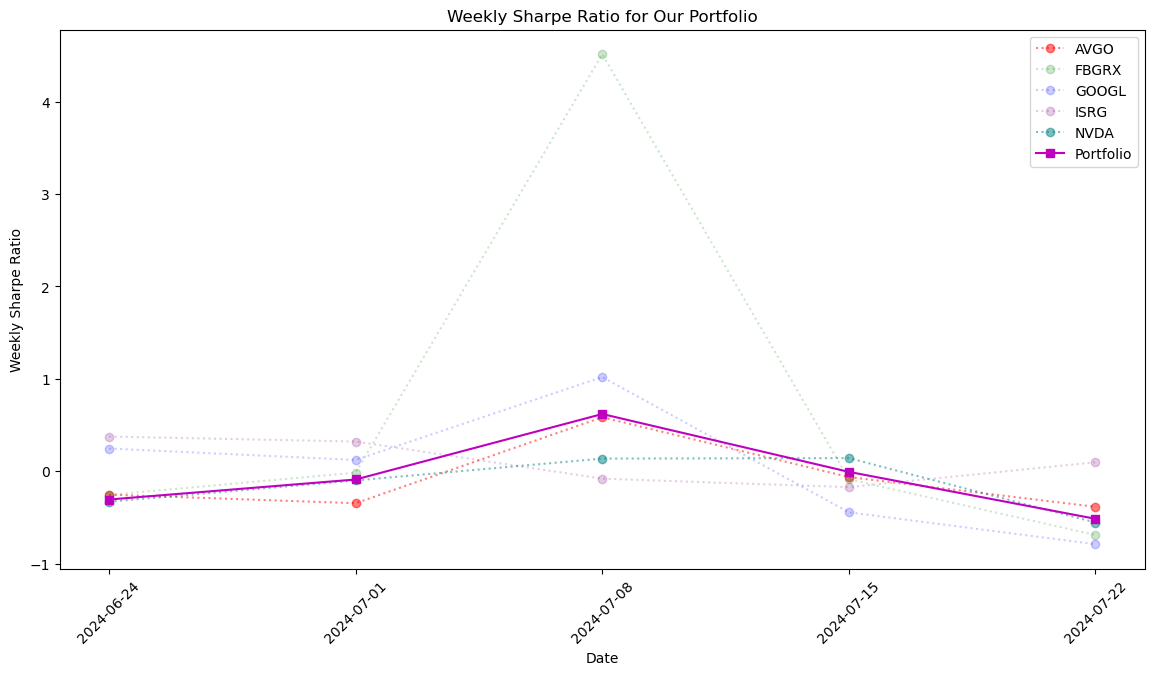

In [49]:
plt.figure(figsize=(14, 7))

dates_list = avgo_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, avgo_data['Weekly Sharpe'], label='AVGO', marker='o', linestyle=':', alpha=0.50, color='red')
plt.plot(dates_list, fbgrx_data['Weekly Sharpe'], label='FBGRX', marker= 'o', linestyle=':', alpha=0.20, color='green')
plt.plot(dates_list, googl_data['Weekly Sharpe'], label='GOOGL', marker= 'o', linestyle=':', alpha=0.20, color='blue')
plt.plot(dates_list, isrg_data['Weekly Sharpe'], label='ISRG', marker= 'o', linestyle=':', alpha=0.20, color='purple')
plt.plot(dates_list, nvda_data['Weekly Sharpe'], label='NVDA', marker= 'o', linestyle=':', alpha=0.50, color='teal')
plt.plot(dates_list, portfolio_data['Weekly Sharpe'], label='Portfolio', marker='s', linestyle='-', color='m')

# Set x-axis labels to the dates list
plt.xticks(dates_list, rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Sharpe Ratio')
plt.title('Weekly Sharpe Ratio for Our Portfolio')
plt.legend()

# Display the plot
plt.show()

The Sharpe Ratio of $S_{portfolio} = -0.5$ indicates that the portfolio’s returns do not adequately compensate for the risk taken. This negative Sharpe Ratio highlights the inefficiency of the portfolio in terms of risk-adjusted returns, suggesting that investors are not being rewarded sufficiently for the high volatility they are exposed to. ISRG is the only stock with a positive Sharpe Ratio, suggesting that it has provided returns that positively contribute to the portfolio's risk-adjusted performance. However, the rest of the stocks provide returns that do not justify the level of risk they introduce to the portfolio

__Value at Risk__

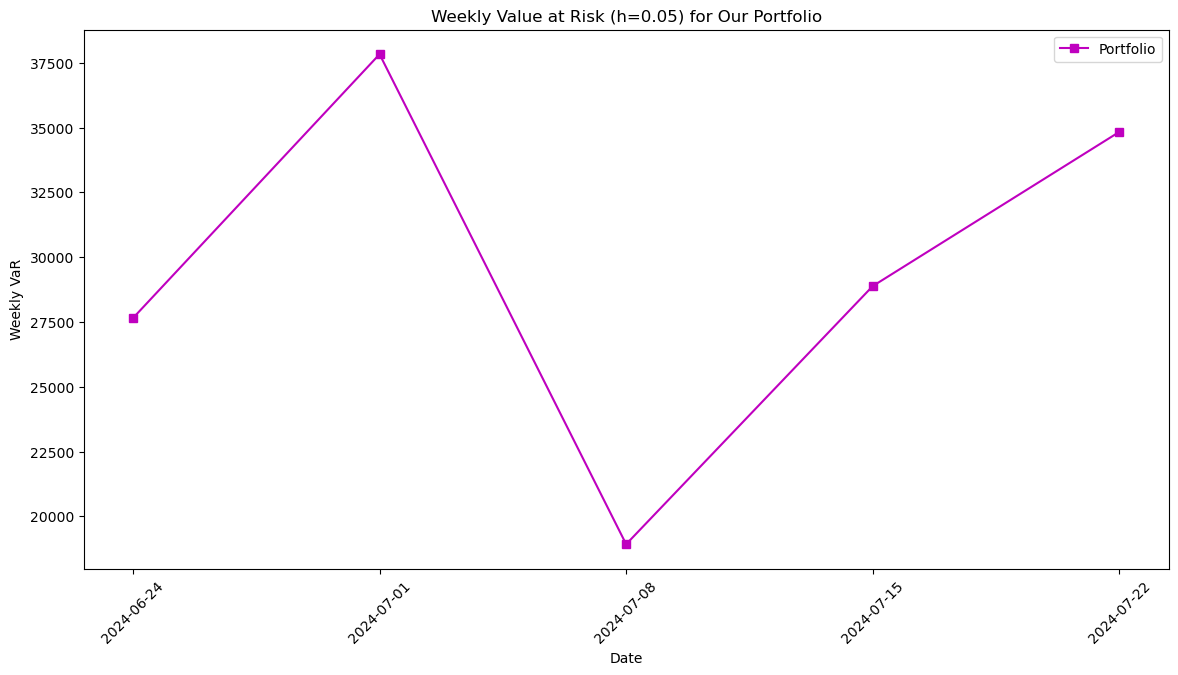

In [50]:
plt.figure(figsize=(14, 7))

dates_list = avgo_data.index.to_list()

# Plot each stock's adjusted close prices
plt.plot(dates_list, portfolio_data['Weekly VaR'], label='Portfolio', marker='s', linestyle='-', color='m')

# Set x-axis labels to the dates list
plt.xticks(dates_list, rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly VaR')
plt.title('Weekly Value at Risk (h=0.05) for Our Portfolio')
plt.legend()

# Display the plot
plt.show()

- The weekly Value at Risk (VaR) for our portfolio ranges between 200,000 and 375,000.
- The overall VaR for the portfolio is $55,885.06.

The peak in VaR during the second week indicates a period of significantly increased risk, with potential losses reaching as high as $375,000. This spike suggests heightened market volatility or other factors affecting the portfolio’s risk profile at that time. The subsequent sharp decrease in VaR following the peak indicates a reduction in risk, suggesting that the conditions driving the peak were temporary or that the portfolio’s risk exposure was managed effectively after the peak period.

Overall, our portfolio had a value at risk of $\text{VaR}_{portfolio} = 55,885.06$ at a 5% confidence level. This means there is a 5% chance that the loss will exceed 55,885.06 in the next month.

### Conclusions & Implications for Our Portfolio

1. **Overall Negative Returns**:
   - The portfolio has a loss over the observed period, which is reflected in the poor performance of most individual stocks within the portfolio.

2. **High Volatility**:
   - The standard deviation of the portfolio is relatively high, which suggests that the portfolio is subject to significant fluctuations in value..
   - The high Beta of our portfolio indicates that it is more than twice as volatile as the market

3. **Jensen Index**:
   - The portfolio’s Jensen Index of 0.0110 is positive, indicating that the portfolio has achieved some excess returns relative to the risk-free rate. This implies that despite the overall negative return, the portfolio has managed to outperform the risk-free rate to a certain extent.

4. **Negative Sharpe Ratio**:
   - The Sharpe Ratio of -0.5000 indicates that the portfolio’s returns do not adequately compensate for the risk taken, highlighting the inefficiency of the portfolio in terms of investors not being rewarded sufficiently for the high volatility they are exposed to.

#### Implications
- We should consider rebalancing the portfolio to reduce exposure to highly volatile stocks like NVDA and AVGO. Diversifying into less volatile stocks can help mitigate risk and stabilize returns.
- Evaluate the long-term growth potential and fundamentals of the individual stocks. While short-term performance has been poor, some stocks may still offer good long-term growth prospects.
- Explore alternative investment opportunities that may provide better risk-adjusted returns. This could include bonds or other asset classes that are less correlated with the stock market.

By addressing these implications and recommendations, investors can make more informed decisions to optimize their portfolio for better performance and reduced risk.

### Appendix

#### Table 1. 
Below is the historical data of our portfolio dating from 06/24/23 to 06/24/24

In [51]:
display(combined_data)

AVGO                   FBGRX                   GOOGL   
           Adj Close Weekly Return Adj Close Weekly Return Adj Close   
Date                                                                   
2023-07-03     83.21         -0.02    153.93         -0.01    119.34  \
2023-07-10     87.32          0.05    160.10          0.04    125.28   
2023-07-17     88.12          0.01    158.88         -0.01    119.88   
2023-07-24     88.42          0.00    162.28          0.02    132.43   
2023-07-31     86.64         -0.02    157.95         -0.03    127.96   
2023-08-07     81.54         -0.06    154.91         -0.02    129.41   
2023-08-14     81.16         -0.00    152.43         -0.02    127.31   
2023-08-21     83.71          0.03    153.76          0.01    129.73   
2023-08-28     85.74          0.02    160.53          0.04    135.50   
2023-09-04     84.27         -0.02    156.79         -0.02    136.22   
2023-09-11     83.70         -0.01    156.07         -0.00    137.24   
2023-09-18     81.47         -0.03    149.49         -0.04    130.10   
2023-09-25     82.07          0.01    150.56          0.01    130.71   
2023-10-02     83.52          0.02    152.69          0.01    137.42   
2023-10-09     87.26          0.04    152.47         -0.00    137.20   
2023-10-16     84.34         -0.03    148.56         -0.03    135.44   
2023-10-23     82.84         -0.02    144.85         -0.02    122.03   
2023-10-30     87.21          0.05    154.32          0.07    128.95   
2023-11-06     94.61          0.08    158.98          0.03    132.44   
2023-11-13     96.61          0.02    162.45          0.02    135.15   
2023-11-20     96.72          0.00    163.77          0.01    136.53   
2023-11-27     91.89         -0.05    164.80          0.01    131.71   
2023-12-04     93.30          0.02    166.50          0.01    134.84   
2023-12-11    111.63          0.20    171.19          0.03    132.45   
2023-12-18    110.86         -0.01    172.47          0.01    141.33   
2023-12-25    110.80         -0.00    173.27          0.00    139.53   
2024-01-01    104.15         -0.06    168.27         -0.03    135.57   
2024-01-08    109.95          0.06    175.23          0.04    142.49   
2024-01-15    120.22          0.09    178.90          0.02    146.21   
2024-01-22    119.60         -0.01    181.28          0.01    152.02   
2024-01-29    121.53          0.02    186.24          0.03    142.22   
2024-02-05    127.40          0.05    190.38          0.02    148.83   
2024-02-12    123.63         -0.03    189.45         -0.00    140.36   
2024-02-19    128.68          0.04    193.02          0.02    143.79   
2024-02-26    138.88          0.08    198.01          0.03    136.98   
2024-03-04    129.90         -0.06    197.75         -0.00    135.25   
2024-03-11    122.64         -0.06    196.22         -0.01    141.02   
2024-03-18    134.35          0.10    202.72          0.03    150.60   
2024-03-25    132.12         -0.02    201.37         -0.01    150.76   
2024-04-01    133.52          0.01    200.36         -0.01    152.33   
2024-04-08    133.98          0.00    198.46         -0.01    157.55   
2024-04-15    120.09         -0.10    187.06         -0.06    153.91   
2024-04-22    133.98          0.12    196.78          0.05    171.75   
2024-04-29    127.41         -0.05    199.63          0.01    167.05   
2024-05-06    132.86          0.04    202.32          0.01    168.46   
2024-05-13    139.09          0.05    205.91          0.02    175.86   
2024-05-20    140.34          0.01    210.10          0.02    174.79   
2024-05-27    132.43         -0.06    208.06         -0.01    172.30   
2024-06-03    140.22          0.06    213.90          0.03    174.26   
2024-06-10    172.95          0.23    219.99          0.03    176.59   
2024-06-17    165.34         -0.04    219.27         -0.00    179.63   

                              ISRG                    NVDA                
           Weekly Return Adj Close Weekly Return Adj